# **Most Streamed Spotify Songs of 2023**

### *An Exploratory Data Analysis on the Spotify 2023 Dataset*

***

***

## **Importing Packages and Reading Data**

#### For this project, we will access the **"spotify-2023"** dataset from [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data). Also, importing all necessary libraries is vital for data analysis.

In [1172]:
# Import all the necessary libraries for data analysis
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Access the data from the same file directory
data = pd.read_csv('spotify-2023.csv', encoding = 'ISO-8859-1')

***

***

## **Overview of the Dataset**

#### *<b>How many rows and columns does the dataset contain?</b>*

In [455]:
# Accessing the data...
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.00,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.00,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.00,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.00,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.00,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.00,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.00,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.00,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.00,29,...,97,C#,Major,82,67,77,8,0,12,5


In [565]:
data.shape

(953, 24)

#### Interpretation:

> In accessing the **spotify-2023** dataset stored on variable `data`, we are able to **display the contents** of the dataset. However, only the first and last five (5) rows are displayed to make it easier to get a quick overview of the dataset’s structure without overwhelming the viewer with too much information at once. In this method, it highlights both the beginning and the end of the dataset. Therefore, it allows users to see how the data is formatted and how big the dataset is, which in this case contains **953 rows** and **24 columns**.

#### *<b>What are the data types of each column?</b>*

In [346]:
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

#### Analysis and Interpretation:

> For context, the column headers represents each song's attributes, popularity, and presence on various music platforms. Using the `pandas.DataFrame.dtypes` function, we are able to determine **the data types of each column** of the dataset.
>
> Based on the output, columns like `track_name`, `artist(s)_name`, and `streams` are **object** type, indicating that they likely contain text data, while columns like `released_year`, `in_spotify_playlists`, and `danceability_%` are of **int64** type, indicating that they contain whole numbers without any decimal places, such as 0, 1, 23, or -100. The “64” means the number is stored using 64 bits of memory which allows a very large range of integer values.

#### *<b>Are there any missing values?</b>*

In [1185]:
# Take the sum of all empty or missing values in each column
data.isnull().sum()

# Display only the column that has missing values
misval = pd.DataFrame({'Column': data.columns,
                       'No. of Missing Values': data.isnull().sum()}).query('`No. of Missing Values` > 0').reset_index(drop=True)
misval

,Column,No. of Missing Values
0,in_shazam_charts,50
1,key,95


#### Analysis and Interpretation:

> The syntax `data.isnull().sum()` automatically finds only the missing values `.isnull()` and returns the total `.sum()` of how many missing values or empty data are spotted in each column. The rest of the syntax then only selects which column has any missing value. Based on the output, `in_shazam_charts` and `key` are the only columns that has missing values, obtaining a total number of **50** and **95**, respectively.

***

***

## **Basic Descriptive Statistics**

#### *<b>What are the mean, median, and standard deviation of the</b>* `streams` *<b>column?*

In [1263]:
# Convert to numeric, set errors to NaN
data['streams'] = pd.to_numeric(data['streams'], errors = 'coerce')

# Calculate the mean, median, and standard deviation of the 'streams' column
strm_mean = data['streams'].mean()
strm_median = data['streams'].median()
strm_std = data['streams'].std()

# Create a dataframe for the results
stats = pd.DataFrame({'Statistic': ['Mean', 'Median', 'Standard Deviation'],
                      'Value': [strm_mean, strm_median, strm_std]})
stats

,Statistic,Value
0,Mean,514137424.94
1,Median,290530915.00
2,Standard Deviation,566856949.04


#### Analysis and Interpretation:

> The generated output shows a high variability in the number of streams, with a mean of 514,137,424.94, a median of 290,530,915.00, and a standard deviation of 566,856,949.04, indicating that while some tracks are extremely popular, others have significantly fewer streams. This wide range suggests that the factors contributing to a track's success are diverse and may include elements such as rhythm, lyrics, or promotion strategies.

#### *<b>What is the distribution of</b>* `released_year` *<b>?</b>*

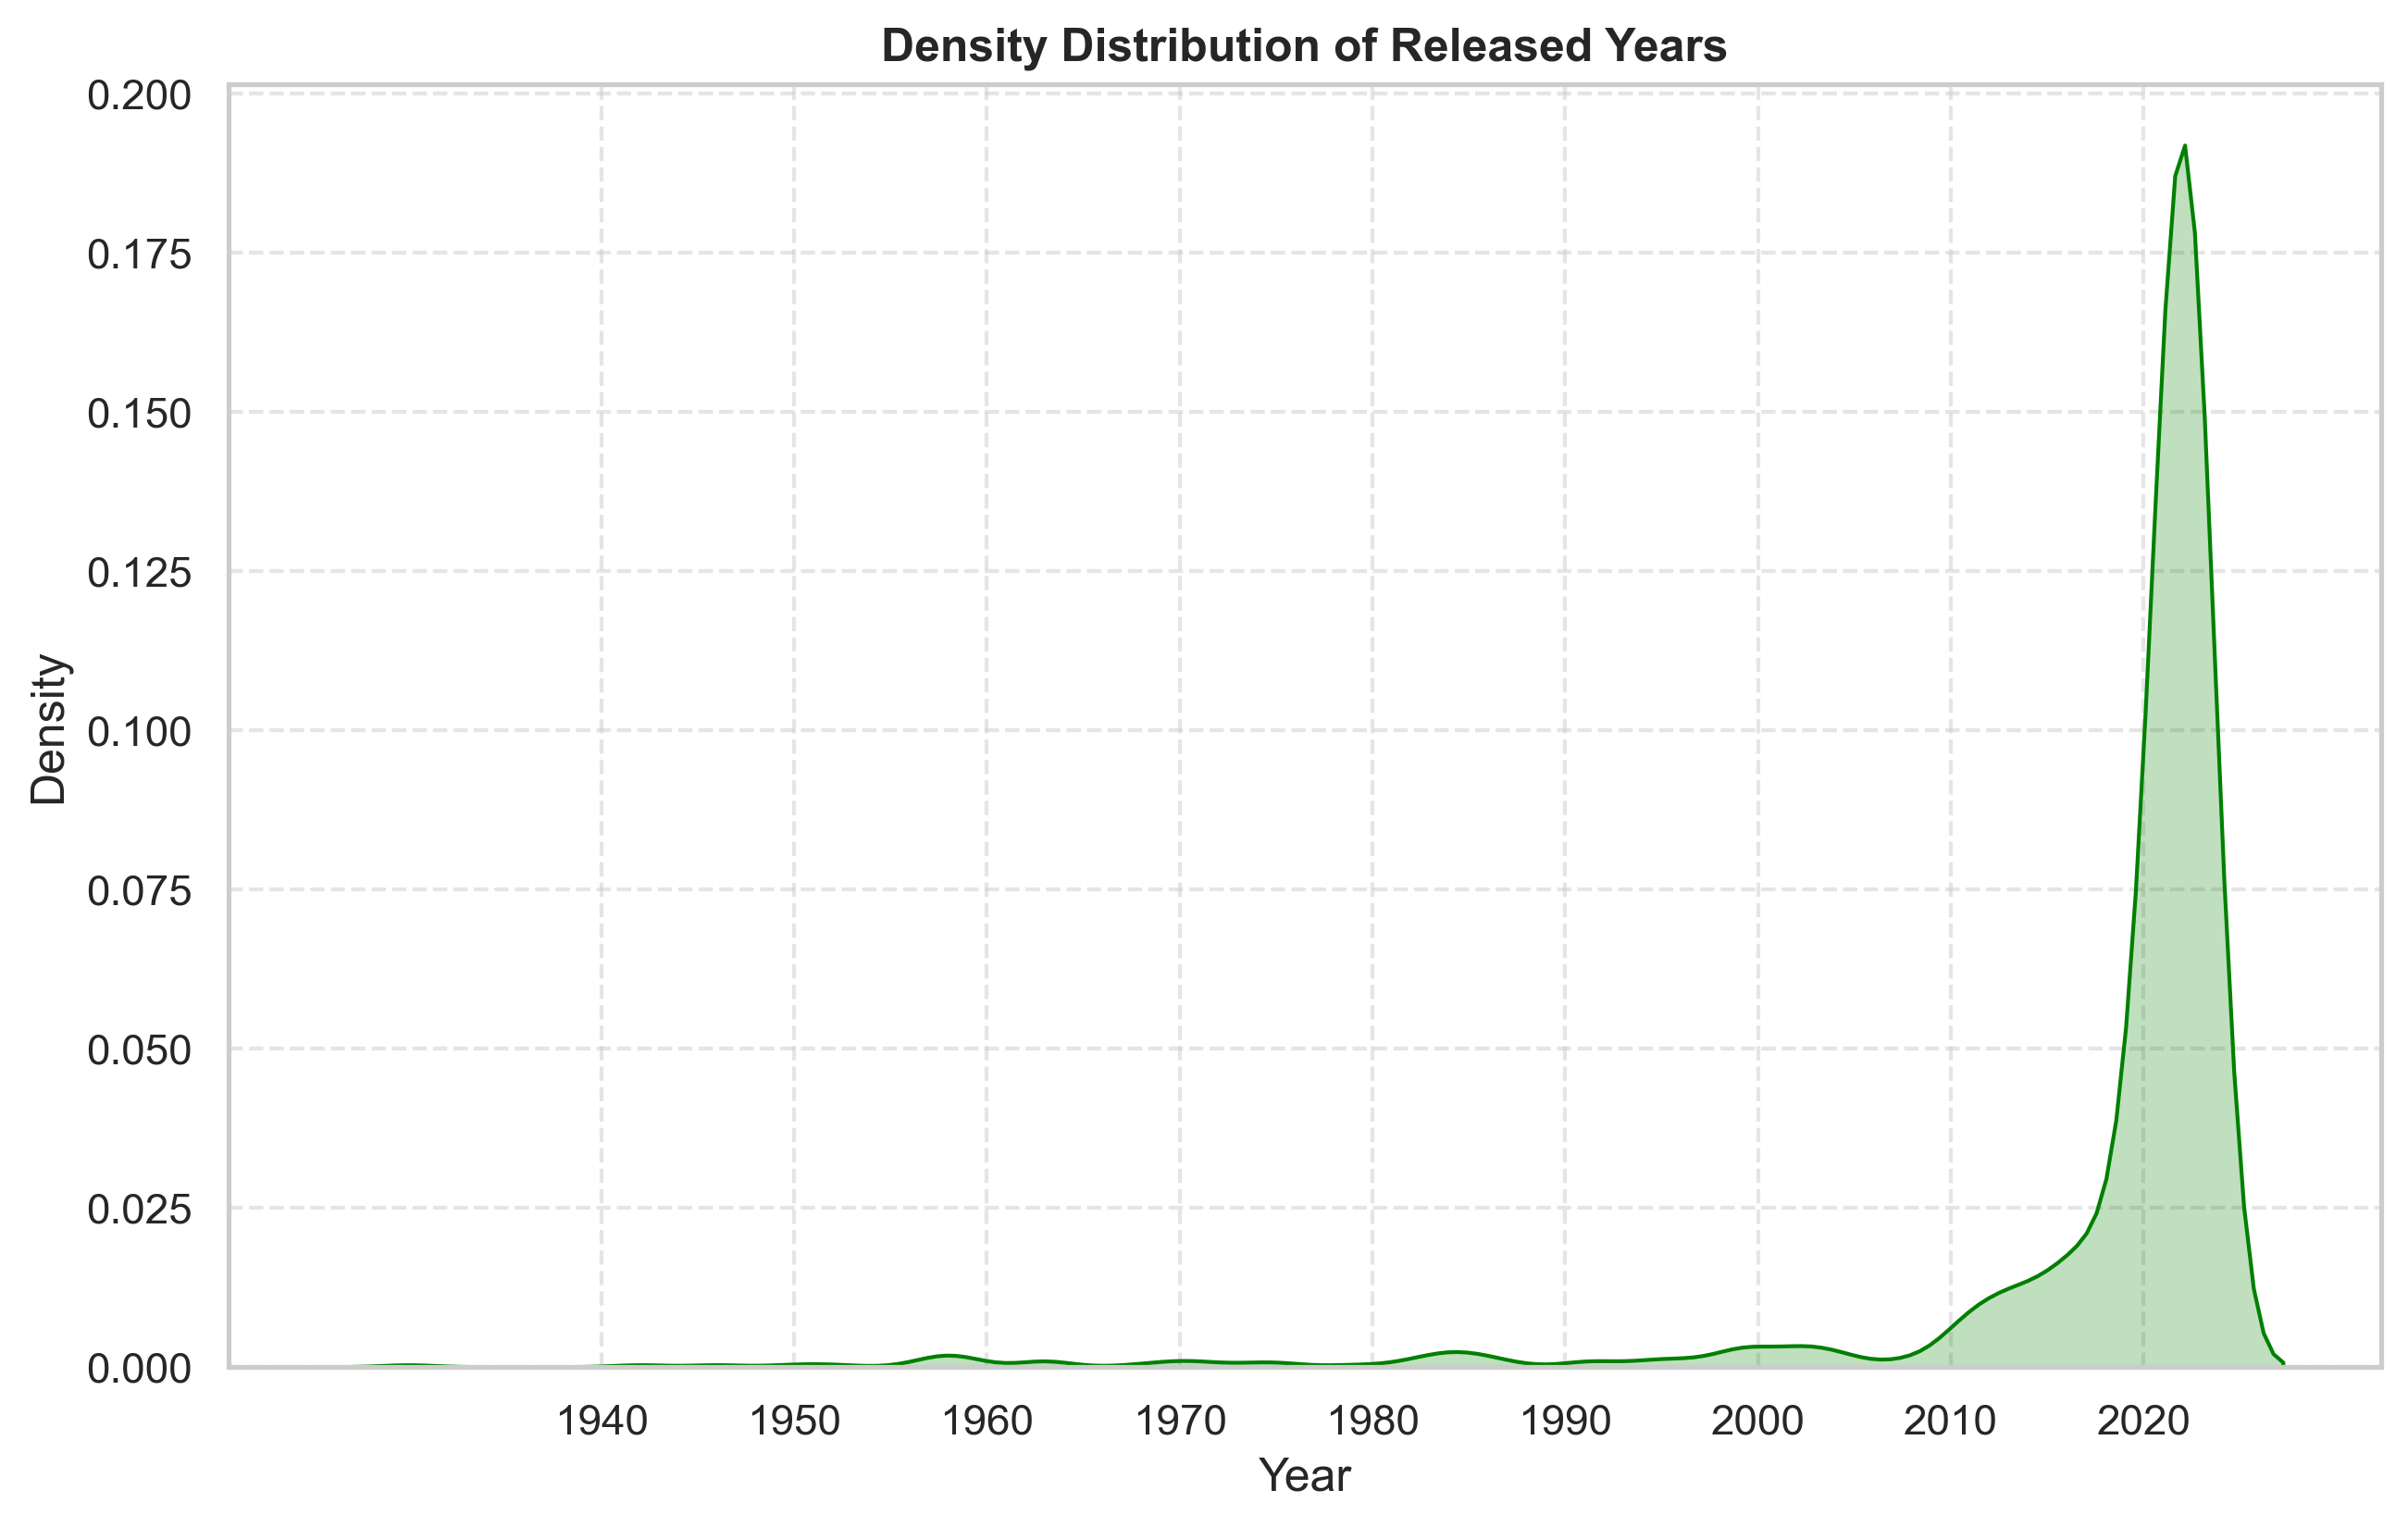

In [1211]:
# Distribution of released_year

# Setting up Seaborn style and figure size
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6), dpi = 300)

# KDE plot 
sns.kdeplot(data=data, x='released_year', fill=True, bw_adjust=0.5, color='green')

# Plot Labeling
plt.title('Density Distribution of Released Years', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.xticks(np.arange(1940,2030,10))
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Displaying the plot
plt.show()

#### Analysis and Interpretation:

> The generated output indicates a significant increase in the number of releases starting around 2010, with a peak around 2020. This suggests a trend where more tracks have been released in recent years, possibly due to the rise of digital platforms and easier access to music production tools. Understanding this trend can help artists and producers focus on recent years' popular styles and genres, potentially increasing their chances of success in the current music market.

#### *<b>What is the distribution of</b>* `artist_count`*<b>?</b>*

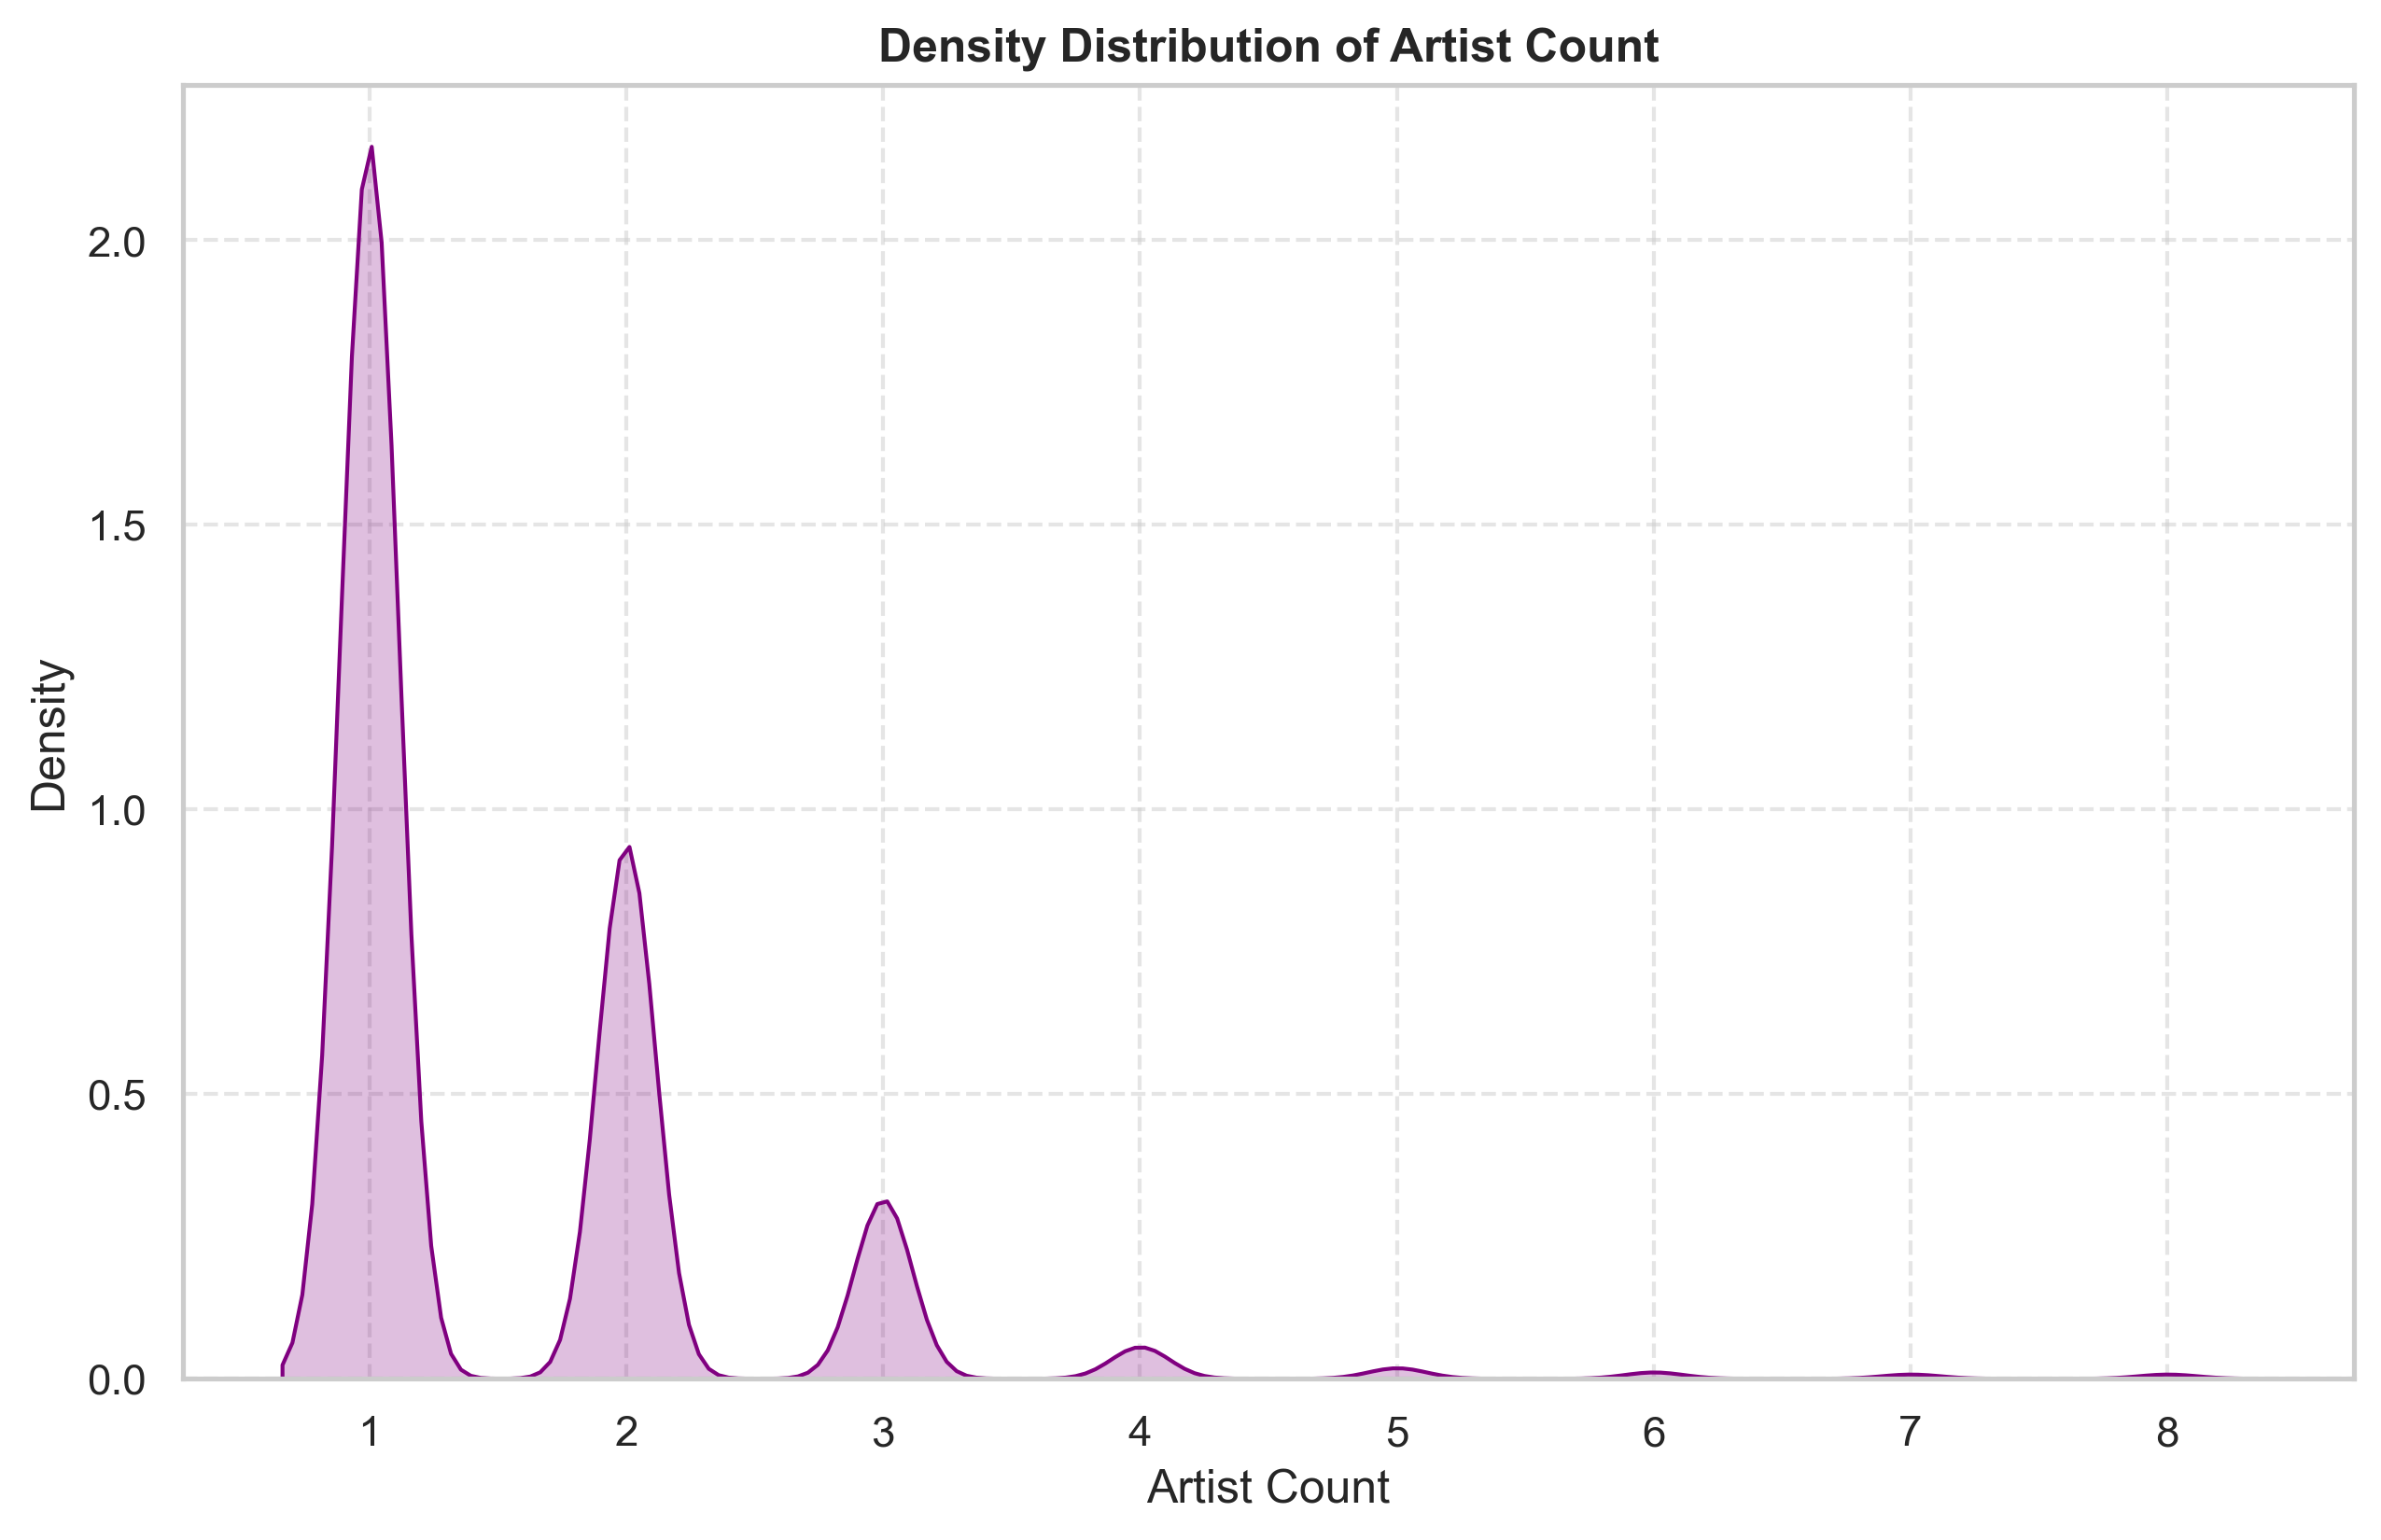

In [1265]:
# Distribution of artist_count

# Setting up Seaborn style and figure size
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6), dpi = 300)

# KDE plot
sns.kdeplot(data=data, x='artist_count', fill=True, bw_adjust=0.5, color='purple')

# Adding titles and labels
plt.title('Density Distribution of Artist Count', fontsize=12, fontweight='bold')
plt.xlabel('Artist Count', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Displaying the plot
plt.show()

#### Analysis and Interpretation:

> The density plot indicates that the majority of tracks feature a single artist, with a sharp decline in the number of tracks as the artist count increases. This suggests that solo performances dominate the music scene, while collaborations, though present, are relatively less common. To capitalize on this trend, artists might focus on solo projects or strategically planned collaborations to enhance their visibility and appeal in a predominantly solo-artist landscape.

#### *<b>Are there any noticeable trends or outliers?</b>*

> The plot of released year versus artist count shows a significant trend where most tracks feature a single artist, especially in recent years. There's a noticeable rise in the number of single-artist tracks starting around the 2010s, which aligns with the increasing accessibility of music production and digital distribution platforms. Outliers in the data include a few years with a higher count of multi-artist tracks, potentially indicating specific periods of heightened collaboration within the industry.

***

***

## **Top Performers**

#### *<b>Which track has the highest number of streams? Display the top 5 most streamed tracks.</b>*

In [1267]:
# Select specific columns from the data DataFrame: 'track_name', 'artist(s)_name', and 'streams'
# Sort the resulting DataFrame by the 'streams' column in descending order
# Retrieve the top 5 entries with the highest number of streams
top = data[['track_name','artist(s)_name','streams']].sort_values(by='streams', ascending=False).head(5)
top

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3703895074.00
179,Shape of You,Ed Sheeran,3562543890.00
86,Someone You Loved,Lewis Capaldi,2887241814.00
620,Dance Monkey,Tones and I,2864791672.00
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550.00


#### Analysis and Interpretation:

> This syntax provided extracts the columns **track_name**, **artist(s)_name**, and **streams** from a dataset and **sorts them in descending order** based on the number of streams. The `.sort_values(by='streams)` function is used to arrange the tracks, with `ascending=False` ensuring the highest values appear first. The `.head(5)` function then retrieves the top five tracks with the most streams. The resulting output shows “Blinding Lights” by The Weeknd as the most-streamed track, followed by “Shape of You” by Ed Sheeran and others, highlighting popular songs based on their high streaming numbers.

#### *<b>Who are the top 5 most frequent artists based on the number of tracks in the dataset?</b>*

In [378]:
# Create a DataFrame for the artist counts
artist_counts = pd.DataFrame(data['artist(s)_name'].value_counts().reset_index())
artist_counts.columns = ['Artist', 'Track Count']

# Display the top 5 most frequent artists in a table format
artist_counts.head(5)

,Artist,Track Count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


#### Analysis and Interpretation:

> The generated output shows a summary of the five most frequent artists in the dataset, ranked by the number of tracks they have, with Taylor Swift leading at 34 tracks, followed by The Weeknd, Bad Bunny, SZA, and Harry Styles. This count-based ranking highlights popular artists, which might reflect recent music trend or preferences if this dataset includes streaming or sales data. The code used effectively leverages `value_counts()` on the `artist(s)_name` column to achieve this ranking, providing an insightful look into which artists have the most representation in the dataset.

***

***

## **Temporal Trends**

#### *<b>Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.</b>*

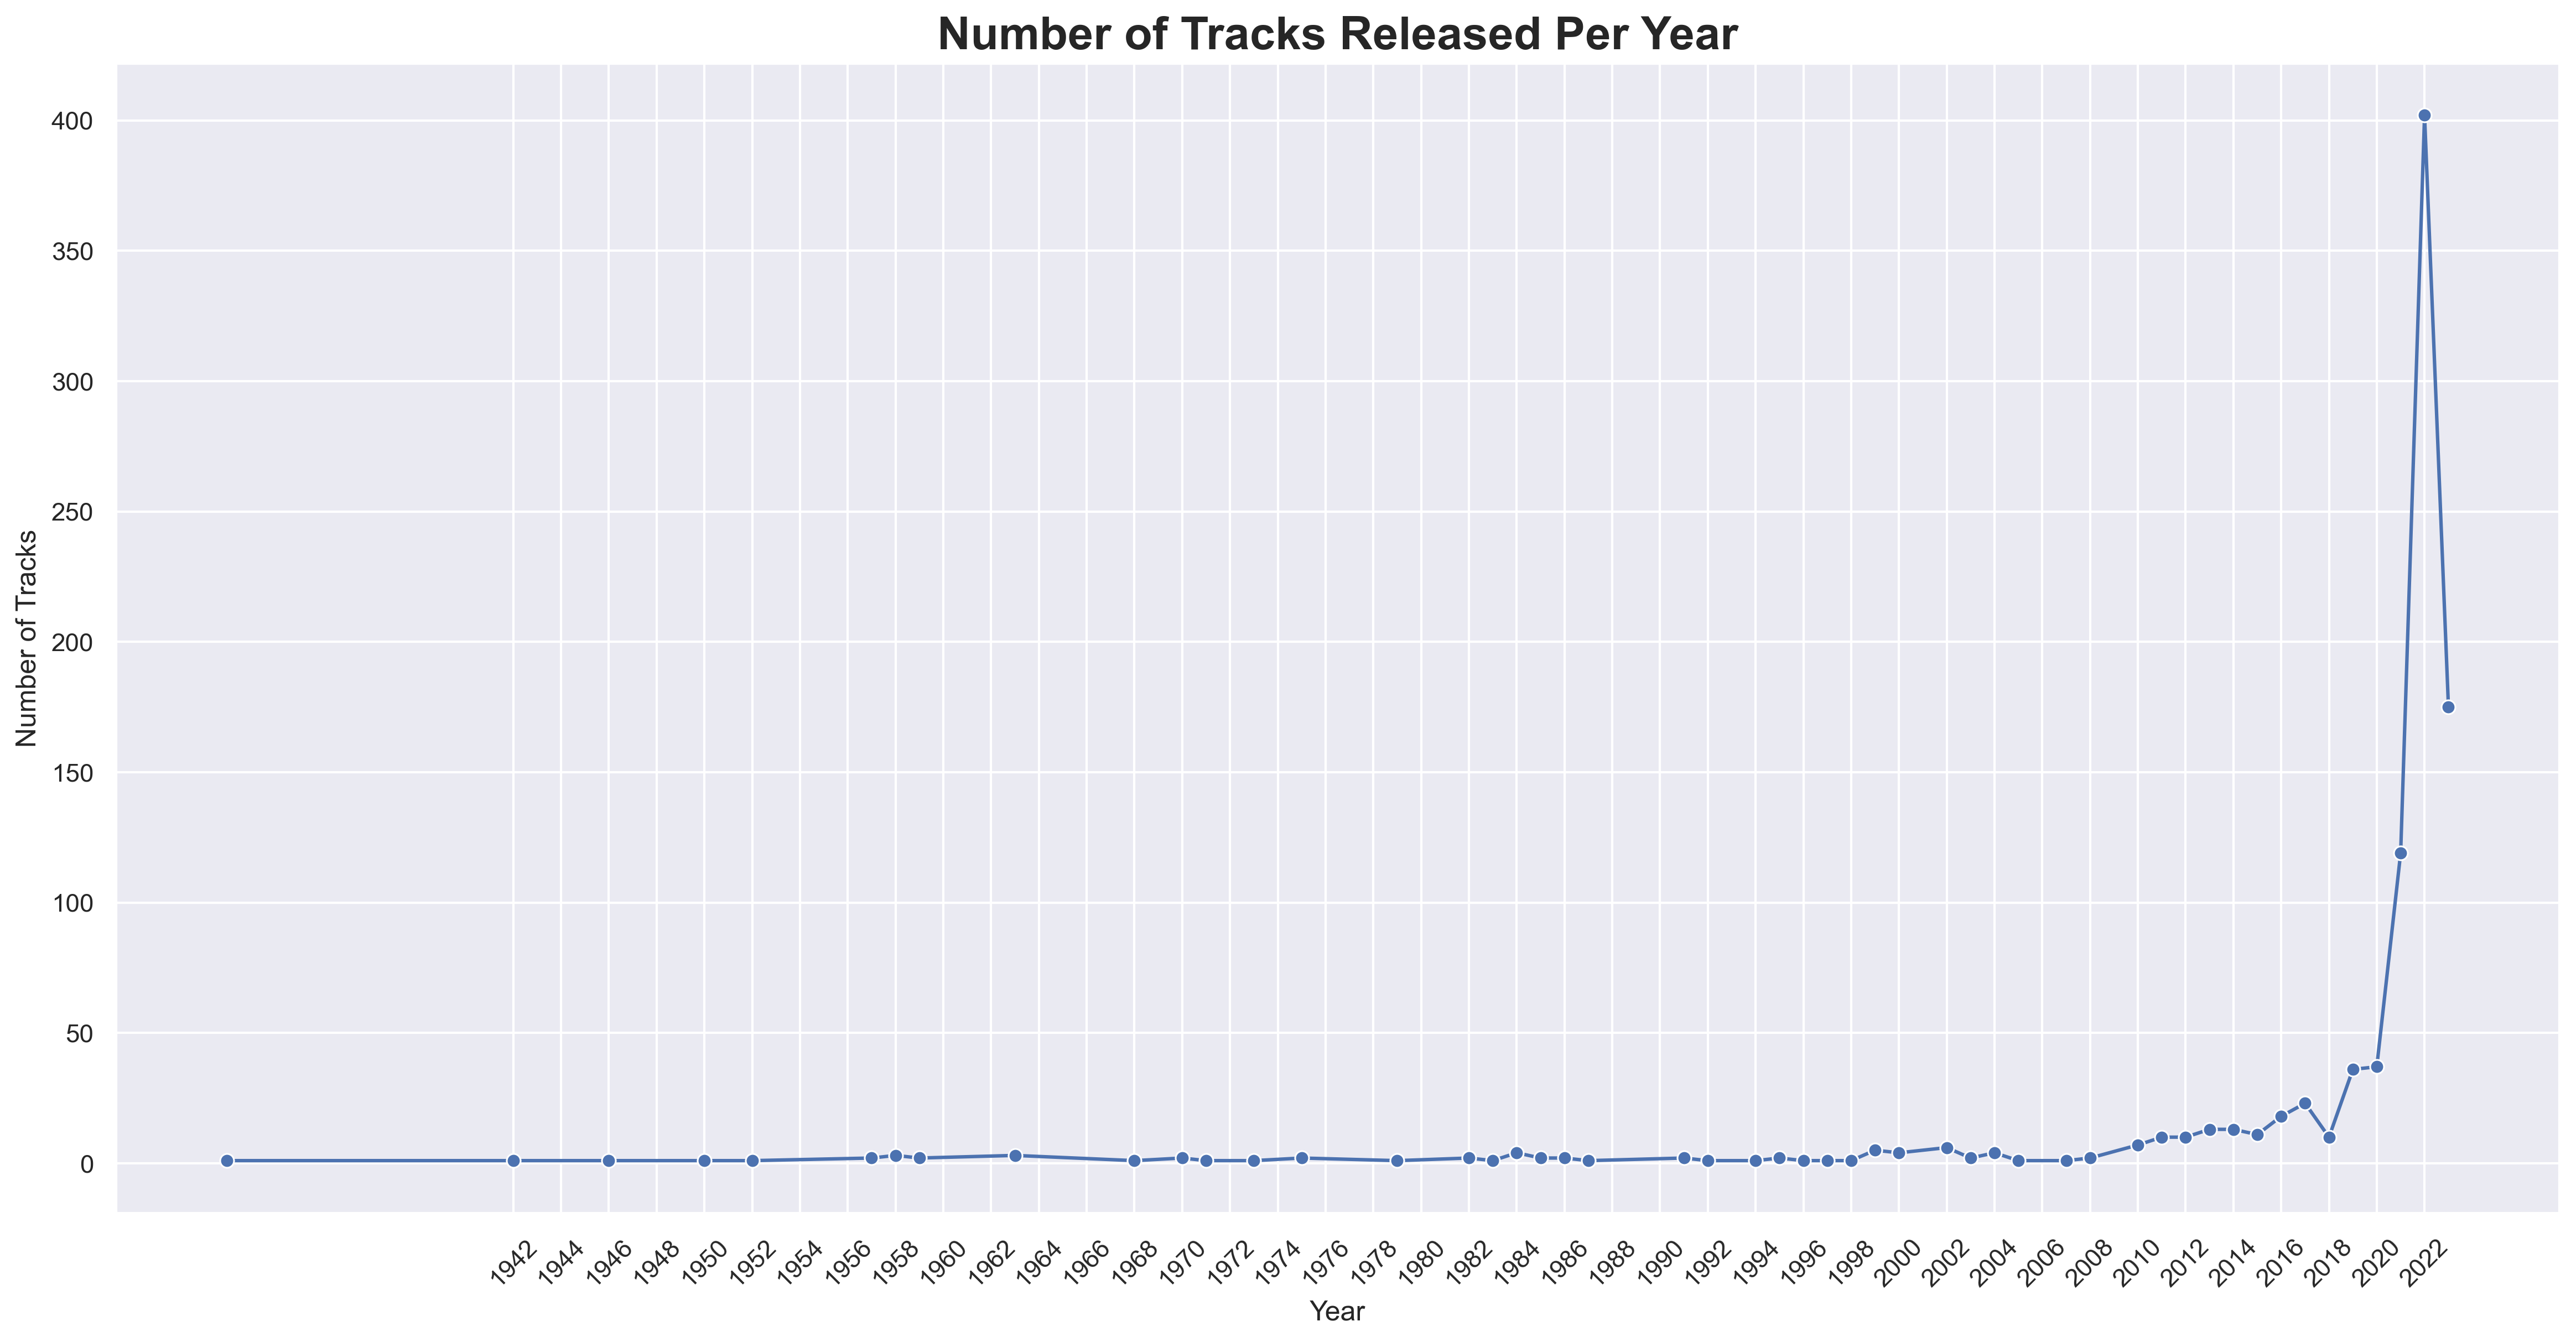

In [1281]:
# Setting up data to calculate for the no. of tracks released in each column of released_year
tracks_per_year = data['released_year'].value_counts().sort_index()

# Setting up Seaborn style and figure size
plt.figure(figsize = (19, 9), dpi = 300)
sns.set_style('darkgrid')

# Line Plot
sns.lineplot(x = tracks_per_year.index, y = tracks_per_year.values, marker = 'o')

# Plot Labelling
plt.title('Number of Tracks Released Per Year', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year')
plt.xticks(ticks = range(1942, 2024, 2), rotation = 45)
plt.ylabel('Number of Tracks', )

# Display the plot
plt.show()

#### Analysis:

> The plot indicates a significant increase in the number of tracks in the last decade, with a sharp peak on the year 2022. This trend suggests a rapid rise in music production and distribution, likely driven by the digital revolution, the ease of online publishing, and the widespread adoption of streaming platforms. From the 1940s through the 2000s, the number of releases remained relatively low and stable, indicating a more controlled and possibly industry-regulated production environment. Insights derived from this trend could include a focus on analyzing the characteristics of recent popular tracks and the influence of social media and streaming algorithms on track popularity, which may offer valuable information for emerging artists aiming to create impactful music.

#### *<b>Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?</b>*

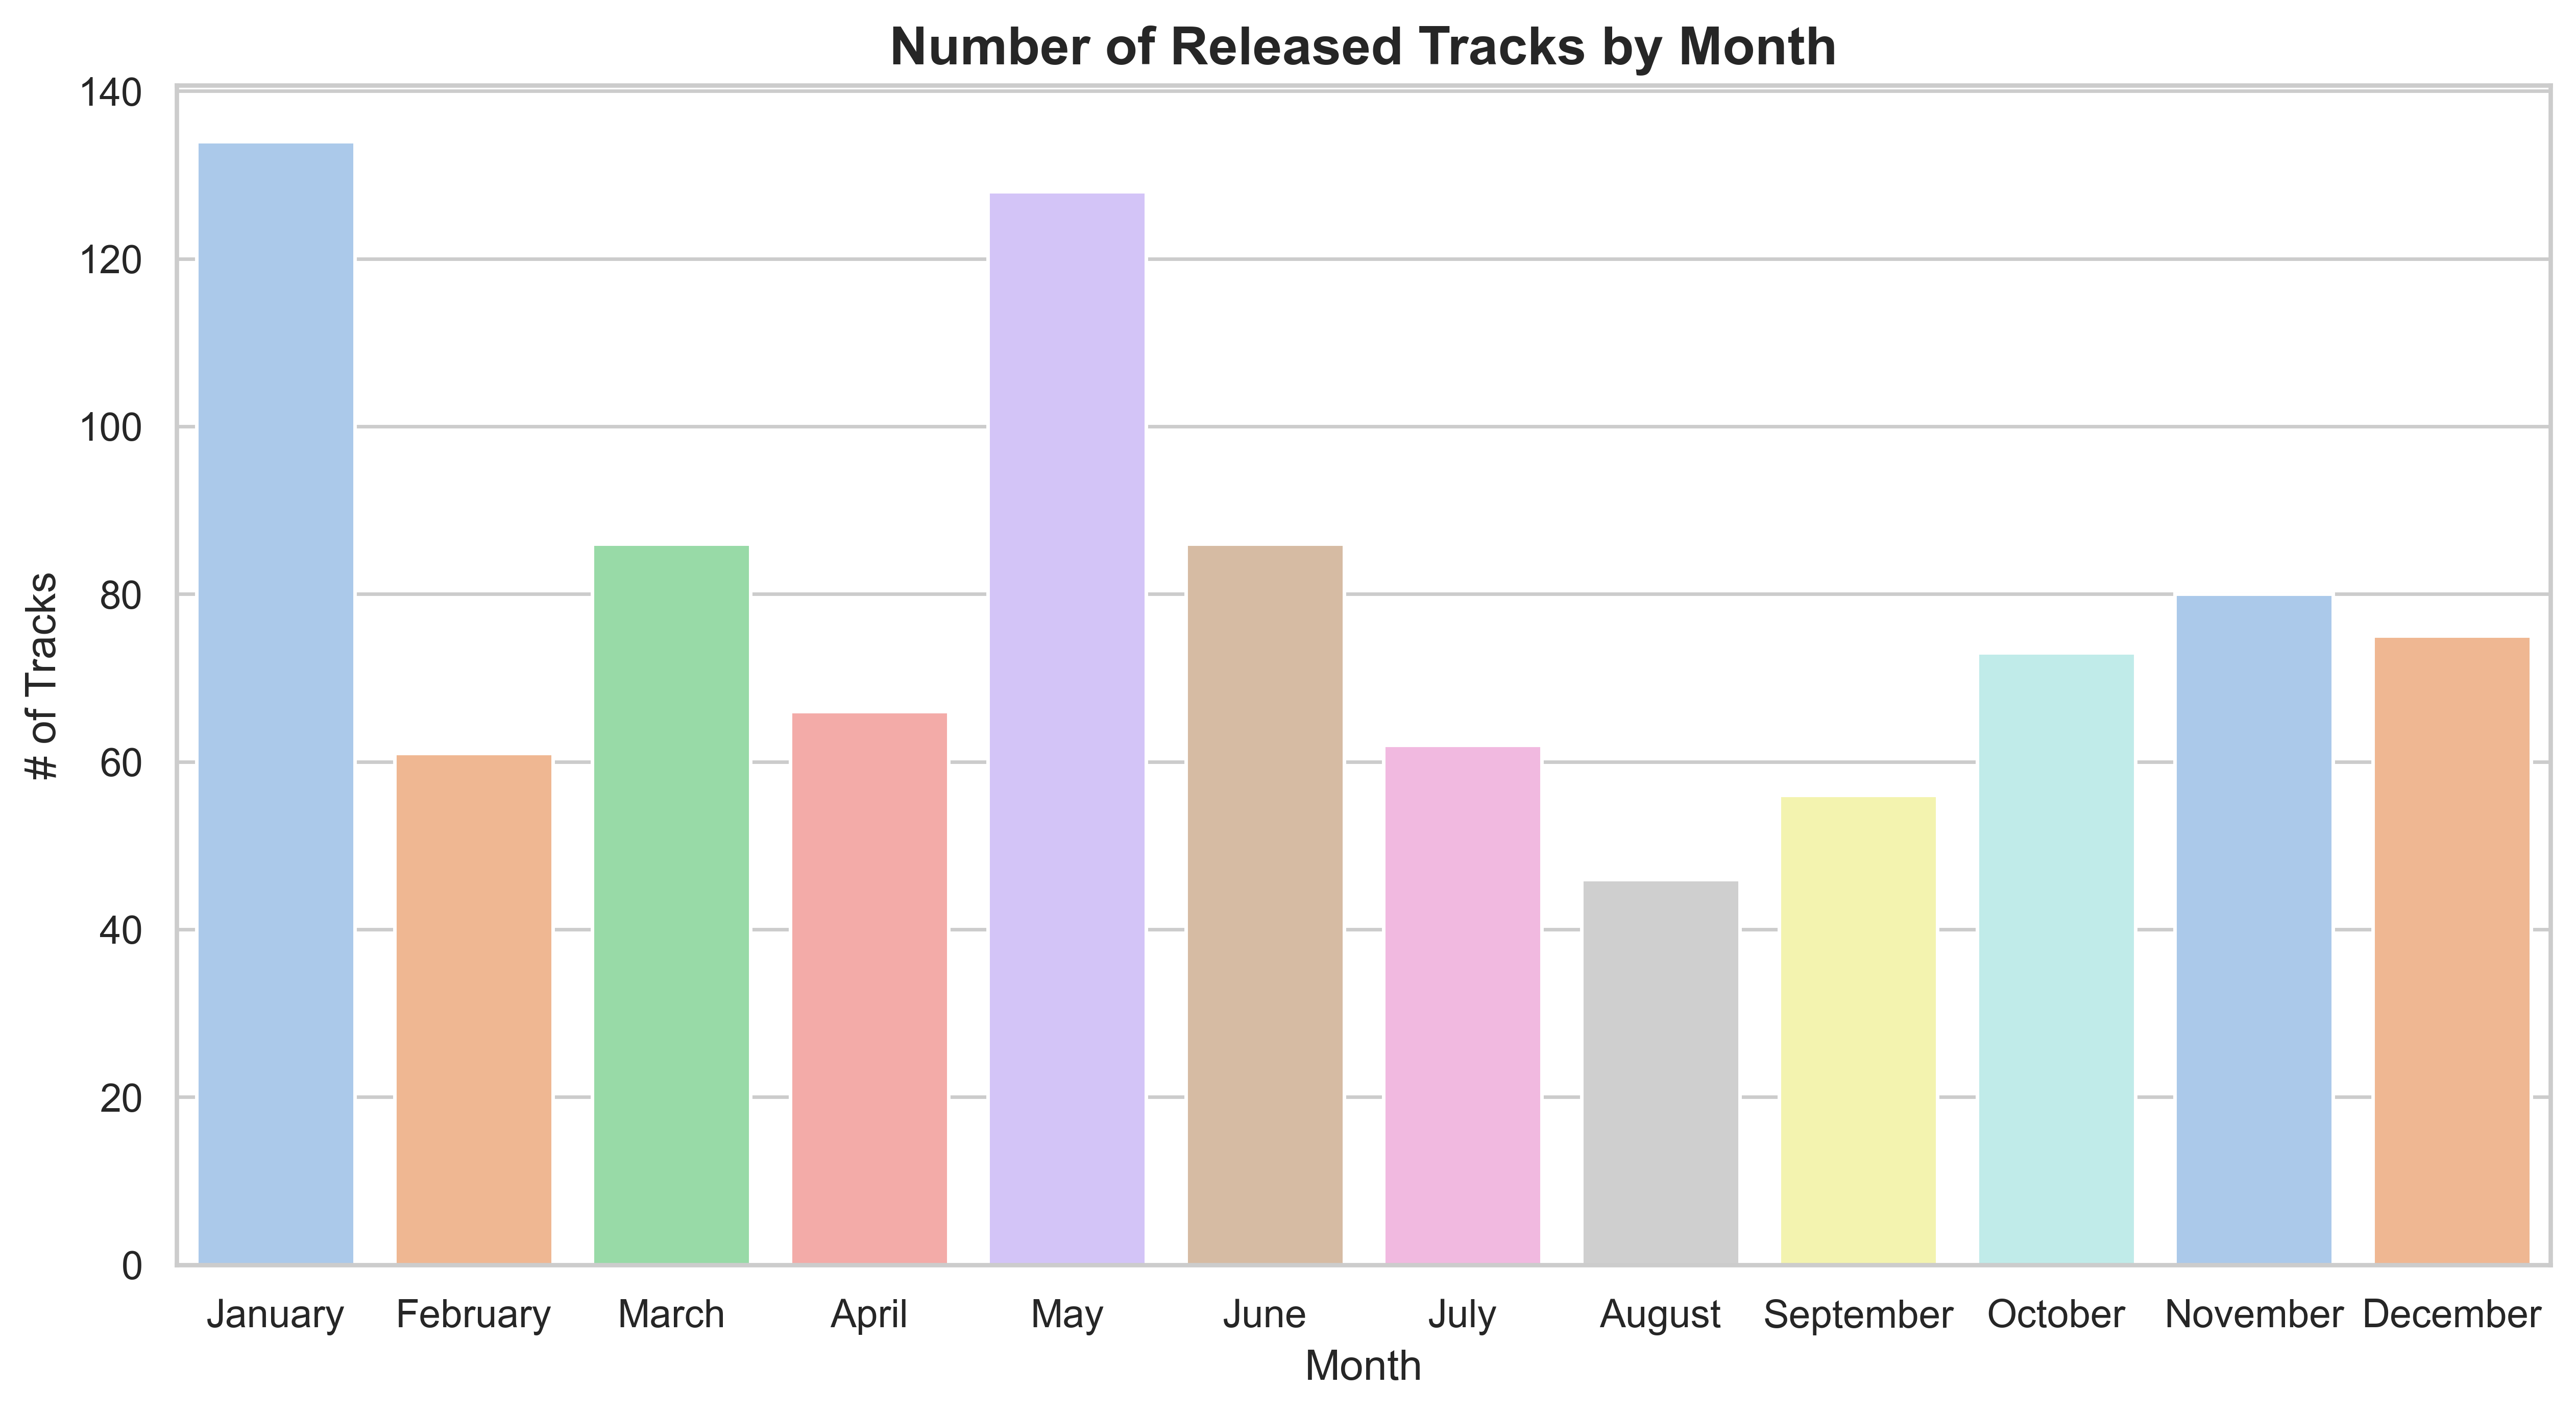

In [1221]:
# Count the number of releases per month and sort by month
monthly_counts = data['released_month'].value_counts().sort_index()
    
# Setting up Seaborn style and figure size
plt.figure(figsize=(12, 6), dpi=500)
sns.set_style('whitegrid')
    
# Bar Plot
sns.barplot(x = monthly_counts.index, y = monthly_counts.values, palette = 'pastel', hue = monthly_counts.index, legend = False)
    
# Set plot titles and labels
plt.title('Number of Released Tracks by Month', fontsize = 15, fontweight = 'bold')
plt.xlabel('Month', fontsize = 12)
plt.xticks(np.arange(12), ['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.ylabel('# of Tracks', fontsize=12)
    
# Show the plot
plt.show()

#### Analysis and Interpretation:

> The bar plot illustrates the number of tracks released each month, showing a notable seasonal pattern. January and May experience the highest number of track releases, with peaks reaching around 140 and 130 tracks, respectively. Conversely, months like February, August, and September have significantly fewer releases, suggesting possible seasonal dips in track production or release scheduling. This pattern may indicate that artists or record labels strategically release new music during months when listeners are more engaged, such as after the holiday season and before summer, potentially to maximize audience reach and popularity.
> 
> For insights, it might be beneficial for artists or labels to release tracks during low-competition months like July or August if they aim to stand out. However, aligning with peak release months (like January and May) could also offer exposure when listeners are actively searching for new music, depending on promotional strategies and the target audience’s behavior.

***

***

## **Genre and Music Characteristics**

#### *<b>Examine the correlation between streams and musical attributes like</b>* `bpm`*<b>,</b>* `danceability_%`*<b>, and</b>* `energy_%`*<b>. Which attributes seem to influence streams the most?</b>*

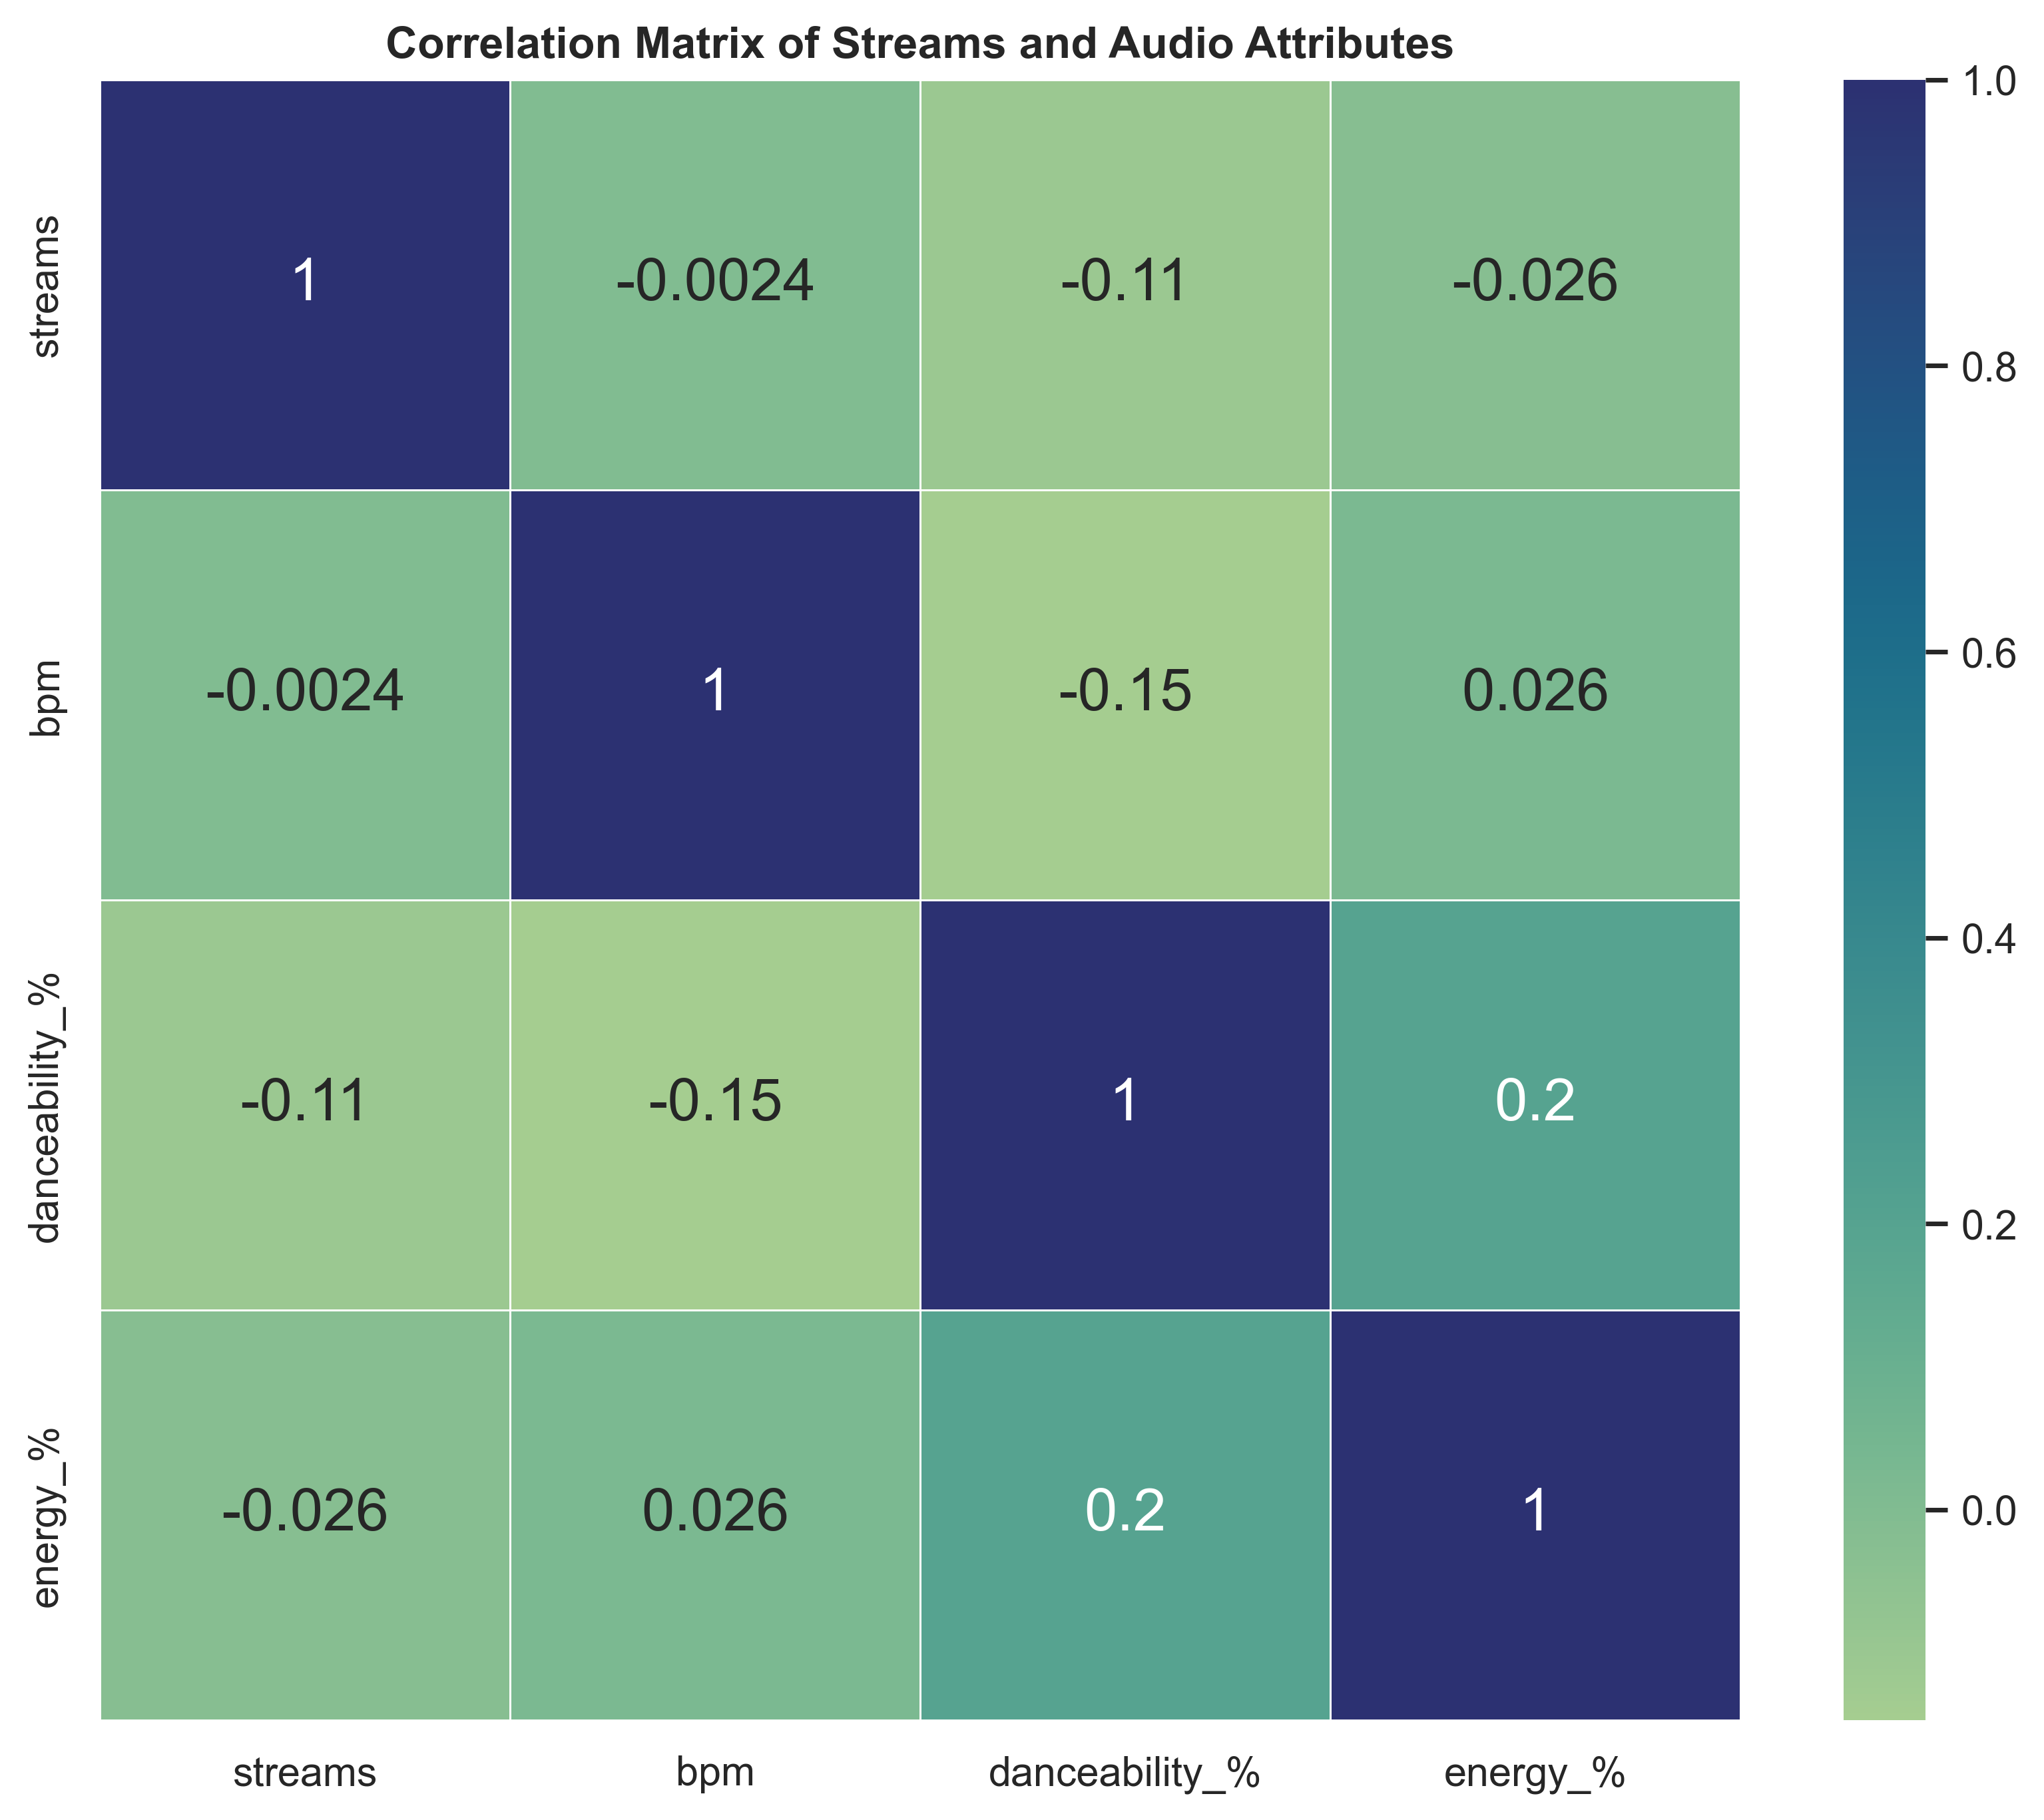

In [1237]:
# Assuming 'data' is your DataFrame
# Convert the relevant columns to numeric, forcing errors to NaN
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['bpm'] = pd.to_numeric(data['bpm'], errors='coerce')
data['danceability_%'] = pd.to_numeric(data['danceability_%'], errors='coerce')
data['energy_%'] = pd.to_numeric(data['energy_%'], errors='coerce')

# Now, create the correlation matrix and heatmap
plt.figure(figsize=(10, 8), dpi=400)
corr_matrix = data[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='crest', linewidths=0.5, square=True, annot_kws={'fontsize': 16})

# Plot Labelling
plt.title('Correlation Matrix of Streams and Audio Attributes', fontweight='bold')

# Display the plot
plt.show()

#### Analysis and Interpretation:

> The correlation matrix reveals minimal relationships between the number of streams and musical attributes such as BPM, danceability, and energy percentage, with all correlation values close to zero. This suggests that attributes like danceability, energy, and tempo (BPM) do not strongly influence a track's streaming popularity in this dataset. Specifically, danceability shows a slightly higher (but still weak) negative correlation with streams, while energy and BPM have almost no correlation. This may imply that other factors, such as lyrical content, marketing strategies, or artist popularity, play a more significant role in driving streams rather than intrinsic audio characteristics.
>
> An insight for artists and producers could be to focus less on modifying these specific audio attributes and more on external factors, like promotional campaigns or collaborations, to enhance track popularity.

#### *<b>Is there a correlation between</b>* `danceability_%` *<b>and</b>* `energy_%`<b>?

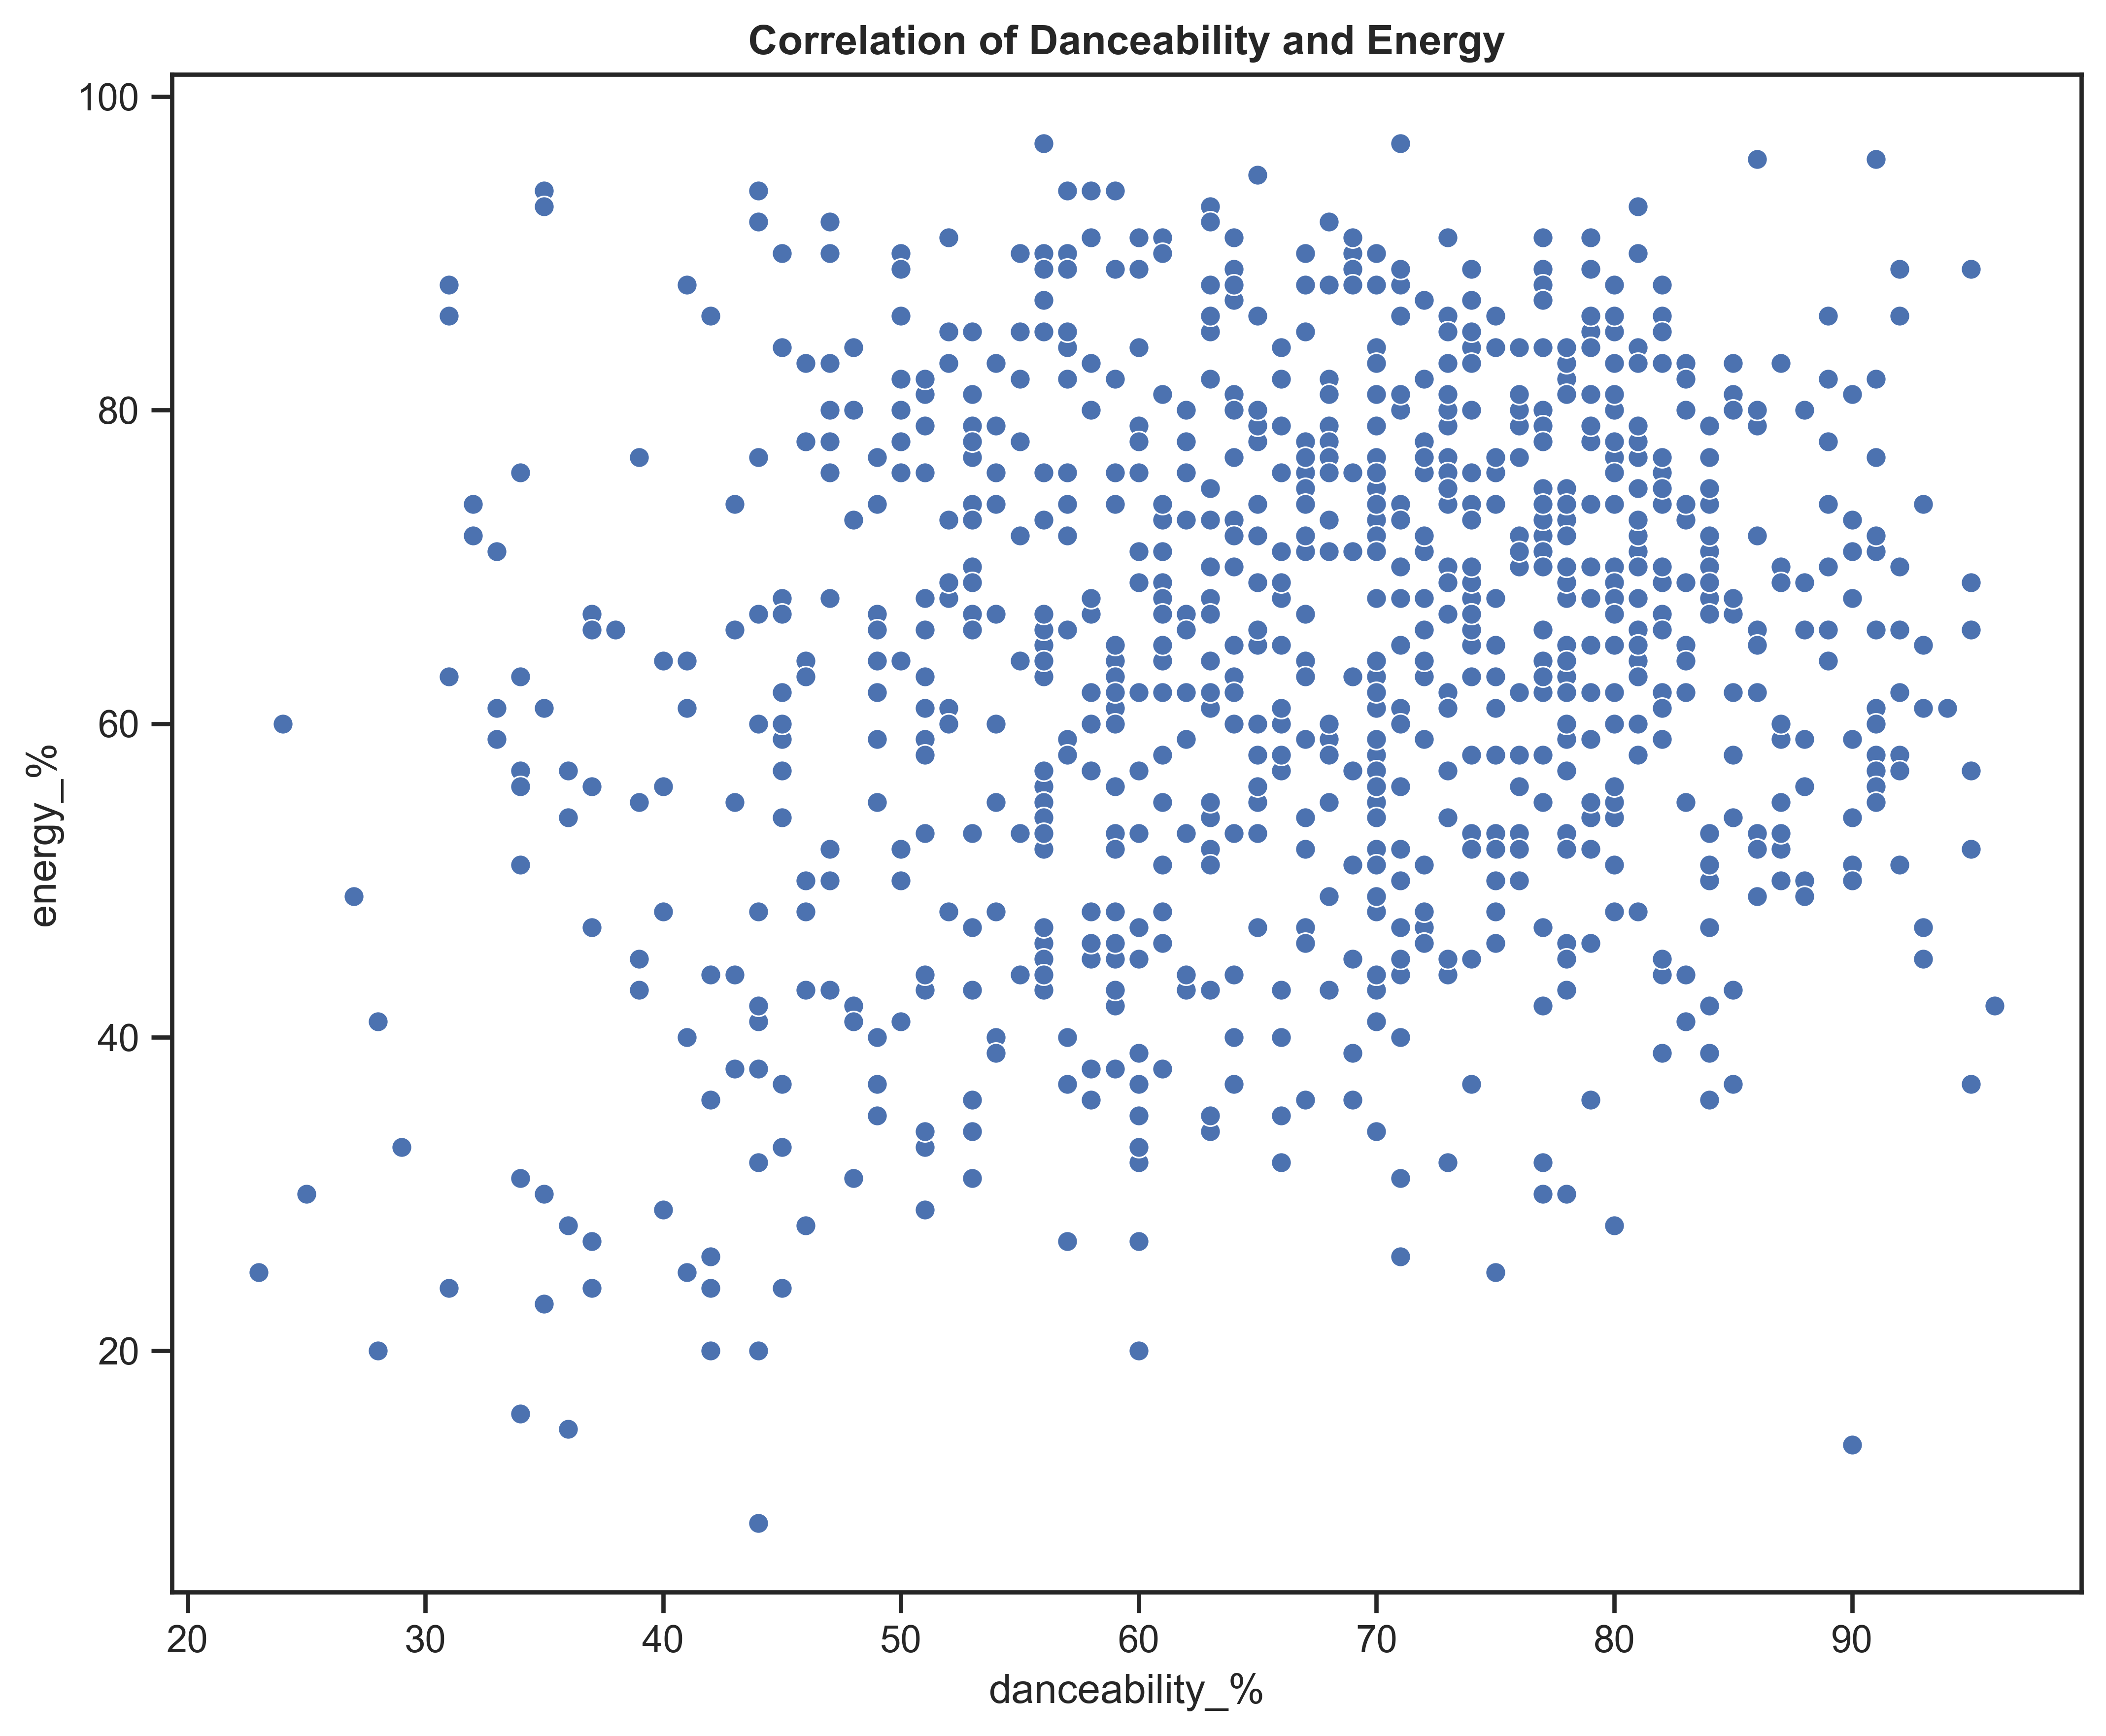

In [1241]:
# Setting up Seaborn style and figure size
plt.figure(figsize=(10, 8), dpi=500)
sns.set_style('ticks')

# Scatterplot
sns.scatterplot(x = 'danceability_%', y = 'energy_%', data = data)

# Plot Labelling
plt.title('Correlation of Danceability and Energy', fontsize = 12, fontweight = 'bold')

# Display the plot
plt.show()

#### Analysis and Interpretation:

> The scatter plot shows no strong linear correlation between danceability and energy percentages, as the data points are widely scattered across the plot. This suggests that tracks with varying levels of danceability can have a wide range of energy levels, indicating that the two attributes are independent and may cater to different aspects of a song's appeal, such as rhythm and tempo versus intensity and loudness. For artists and producers, this independence between danceability and energy allows flexibility in creating tracks that either balance both qualities or emphasize one over the other, depending on their intended style or audience preferences.

#### *<b>How about</b>* `valence_%` *<b>and</b>* `acousticness_%`*<b>?</b>*

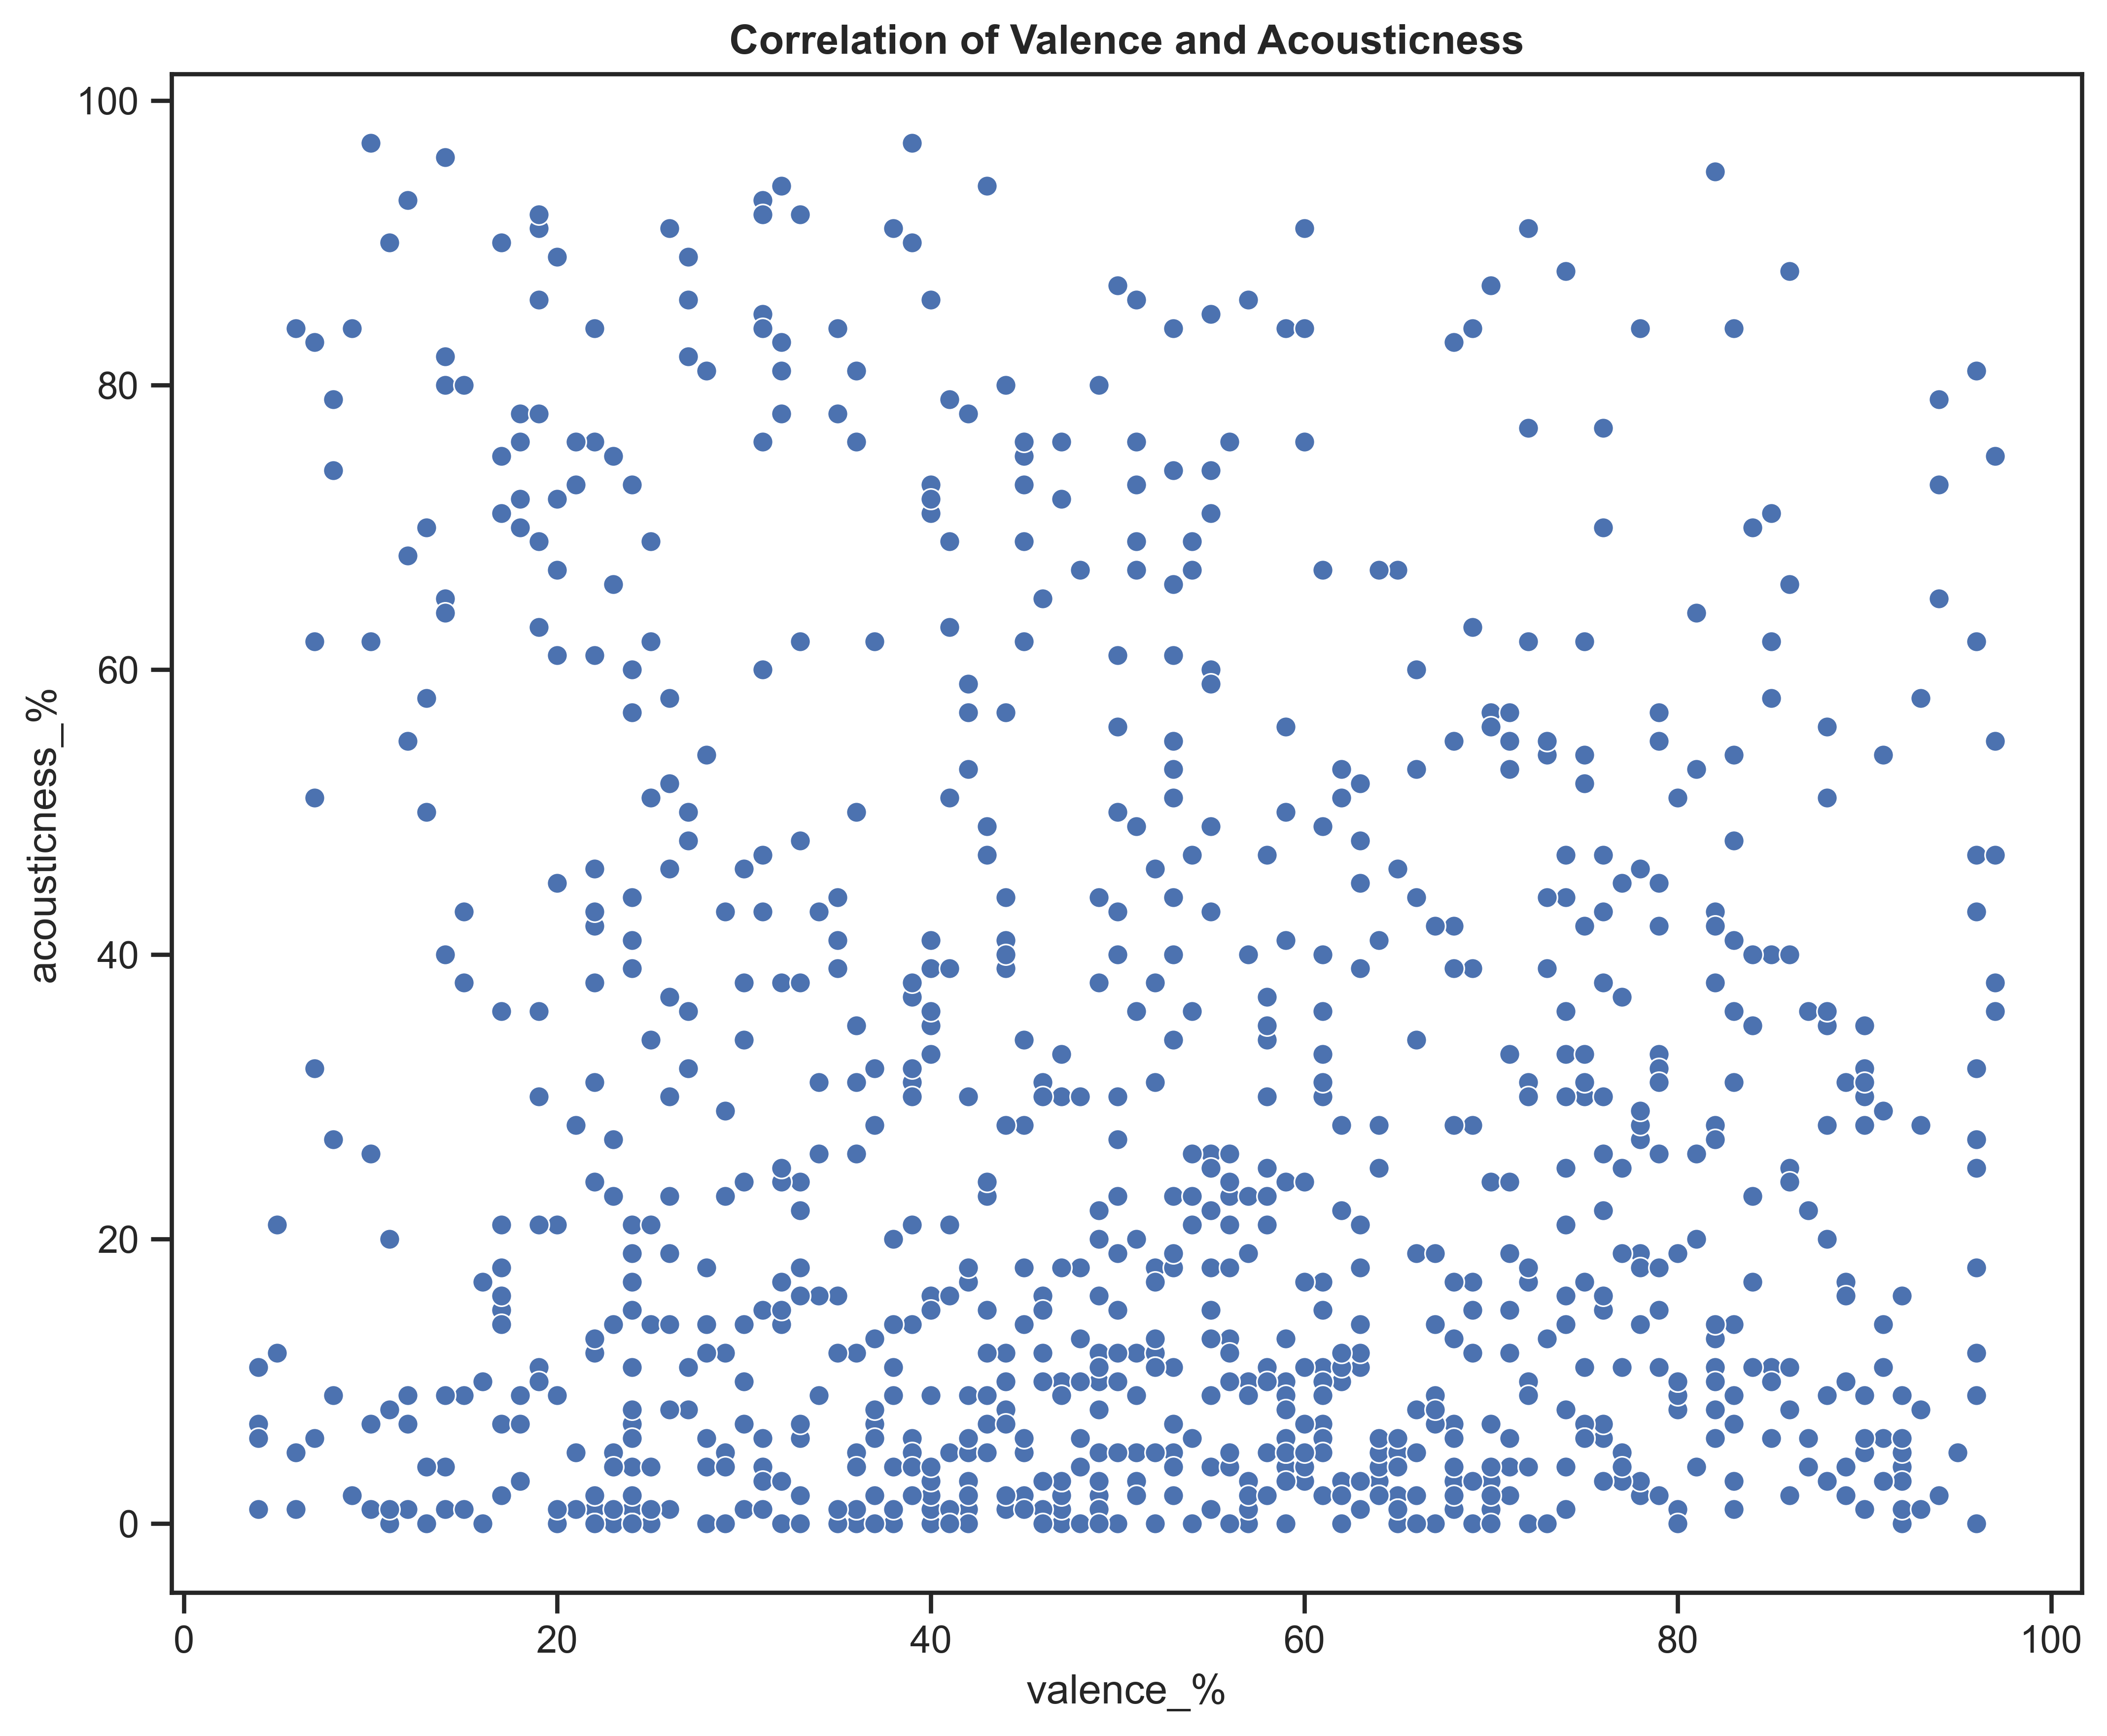

In [1243]:
# Setting up Seaborn style and figure size
plt.figure(figsize=(10, 8), dpi=500)
sns.set_style('ticks')

# Scatterplot
sns.scatterplot(x = 'valence_%', y = 'acousticness_%', data = data)

# Plot Labelling
plt.title('Correlation of Valence and Acousticness', fontsize = 12, fontweight = 'bold')

# Display the plot
plt.show()

#### Analysis and Interpretation:

> The scatter plot reveals no obvious linear relationship between valence and acousticness, indicating that tracks with varying acoustic qualities can span a wide range of positivity. This lack of a clear pattern suggests that acousticness does not significantly dictate the emotional tone of a track, allowing for diverse musical expressions within the same valence range. Consequently, artists can focus on creating acoustically rich tracks without being constrained by the need to alter the valence. For understanding track popularity, one might explore other factors like rhythm, lyrics, or instrumental variety that could have a stronger influence on listener perception and popularity.

***

***

## **Platform Popularity**

#### *<b>How do the numbers of tracks in</b>* `in_spotify_playlists`*<b>,<b>* `in_spotify_charts`*<b>, and</b>* `in_apple_playlists` *<b>compare? Which platform seems to favor the most popular tracks?</b>*

Total Track Counts of Streaming Platforms

in_spotify_playlists    4955719
in_spotify_charts         11445
in_apple_playlists        64625
dtype: int64



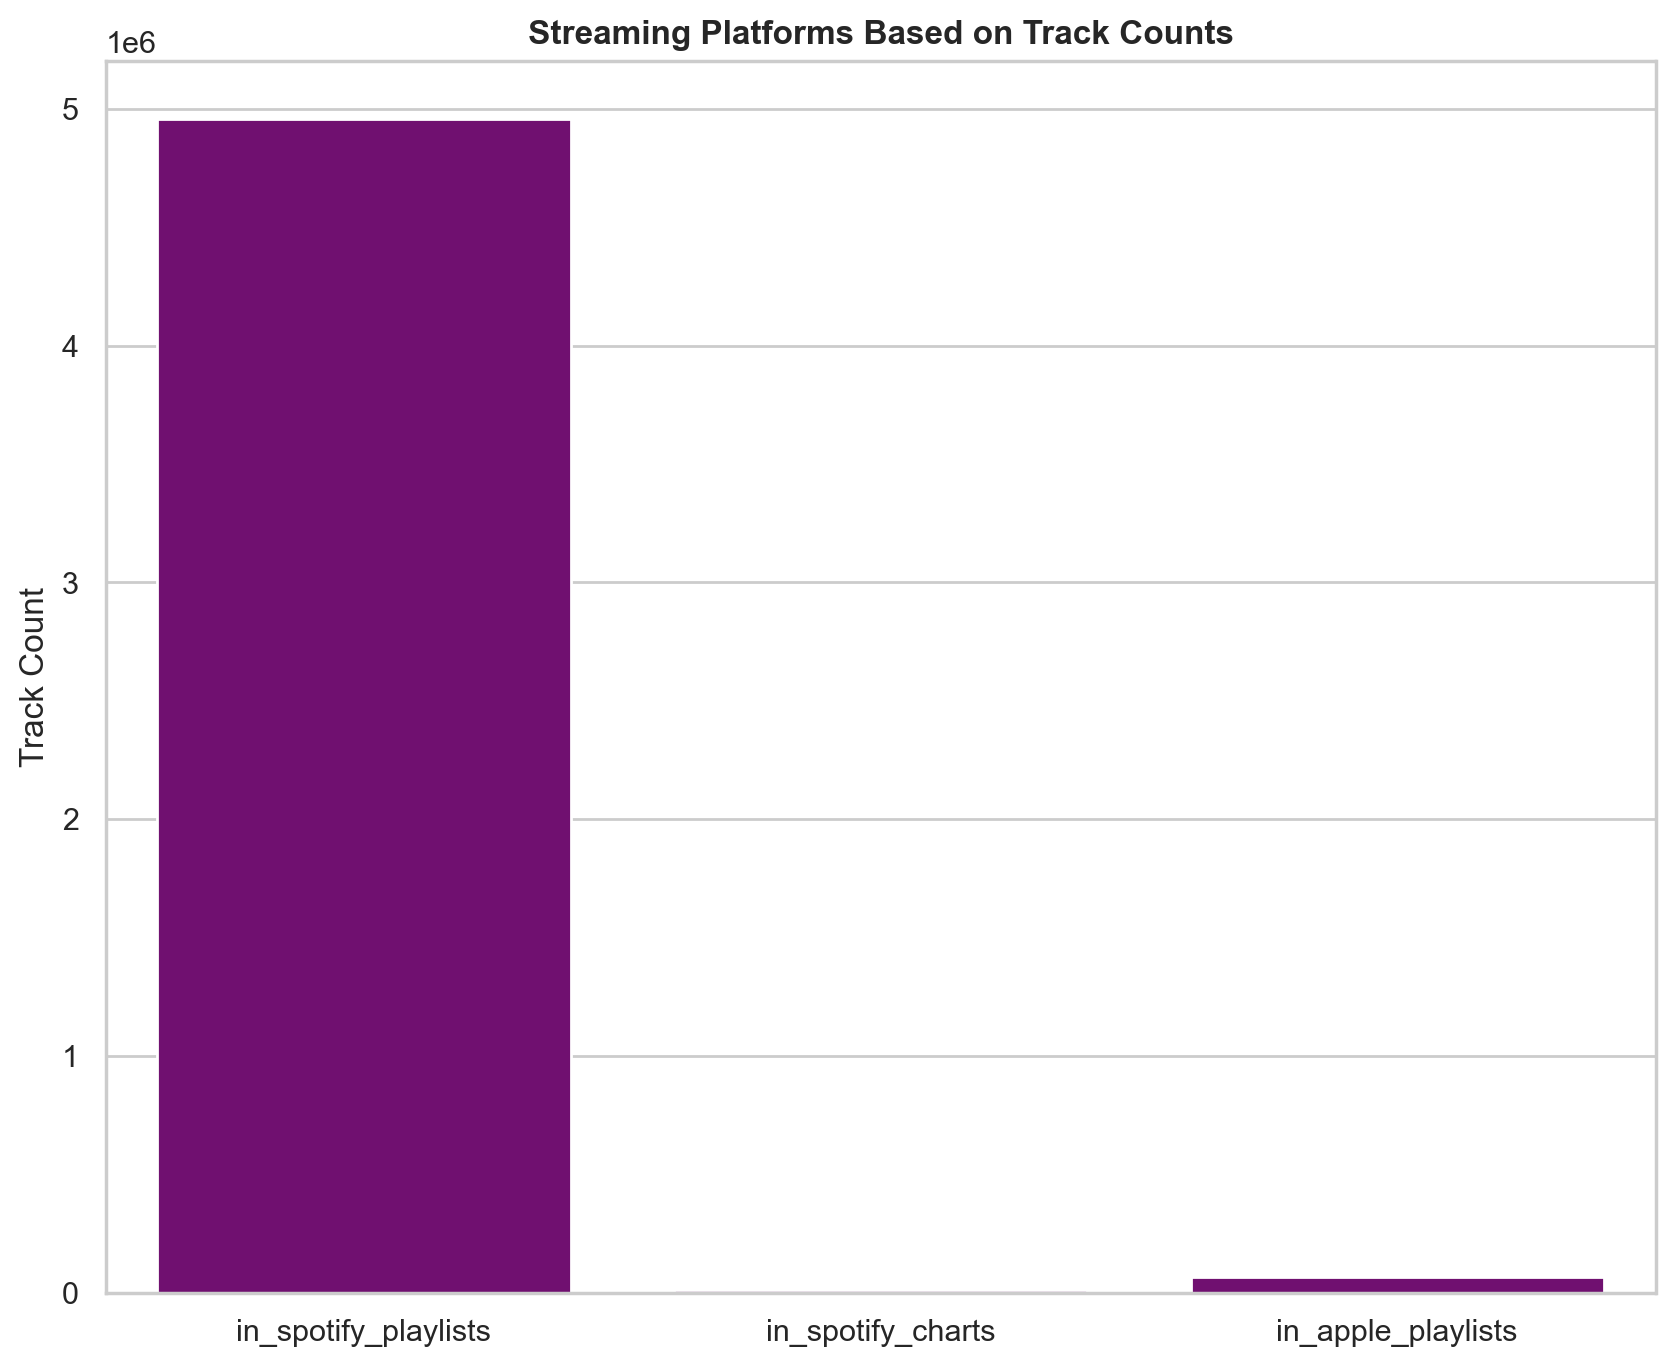

In [1278]:
#  Take the sum of track counts of streaming platforms
pop_platform = data[['in_spotify_playlists','in_spotify_charts','in_apple_playlists']].sum()

# Summary Statistics
print('Total Track Counts of Streaming Platforms')
print('')
print(pop_platform)
print('')

# Setting up Seaborn style and figure size
plt.figure(figsize=(10, 8), dpi=200)

# Barplot
sns.barplot(pop_platform, color='purple')

# Plot Labelling
plt.title('Streaming Platforms Based on Track Counts', fontsize = 12, fontweight = 'bold')
plt.ylabel('Track Count')

# Display the plot
plt.show()

#### Analysis and Interpretation:

> The bar plot generated in the output indicates a significant disparity in track counts across different streaming platforms, with Spotify playlists having the highest count by a substantial margin. This suggests that tracks included in Spotify playlists have a greater chance of gaining exposure and popularity compared to those in Spotify charts or Apple playlists. For artists seeking to boost their popularity, focusing on getting their tracks featured in Spotify playlists would be a strategic move, as it appears to be the most influential platform for music promotion.

***

***

## **Advanced Analysis**

#### *<b>Based on the</b>* `streams` *<b>data, can you identify any patterns among tracks with the same</b>* `key` *<b>or</b>* `mode` *<b>(Major vs. Minor)?</b>*

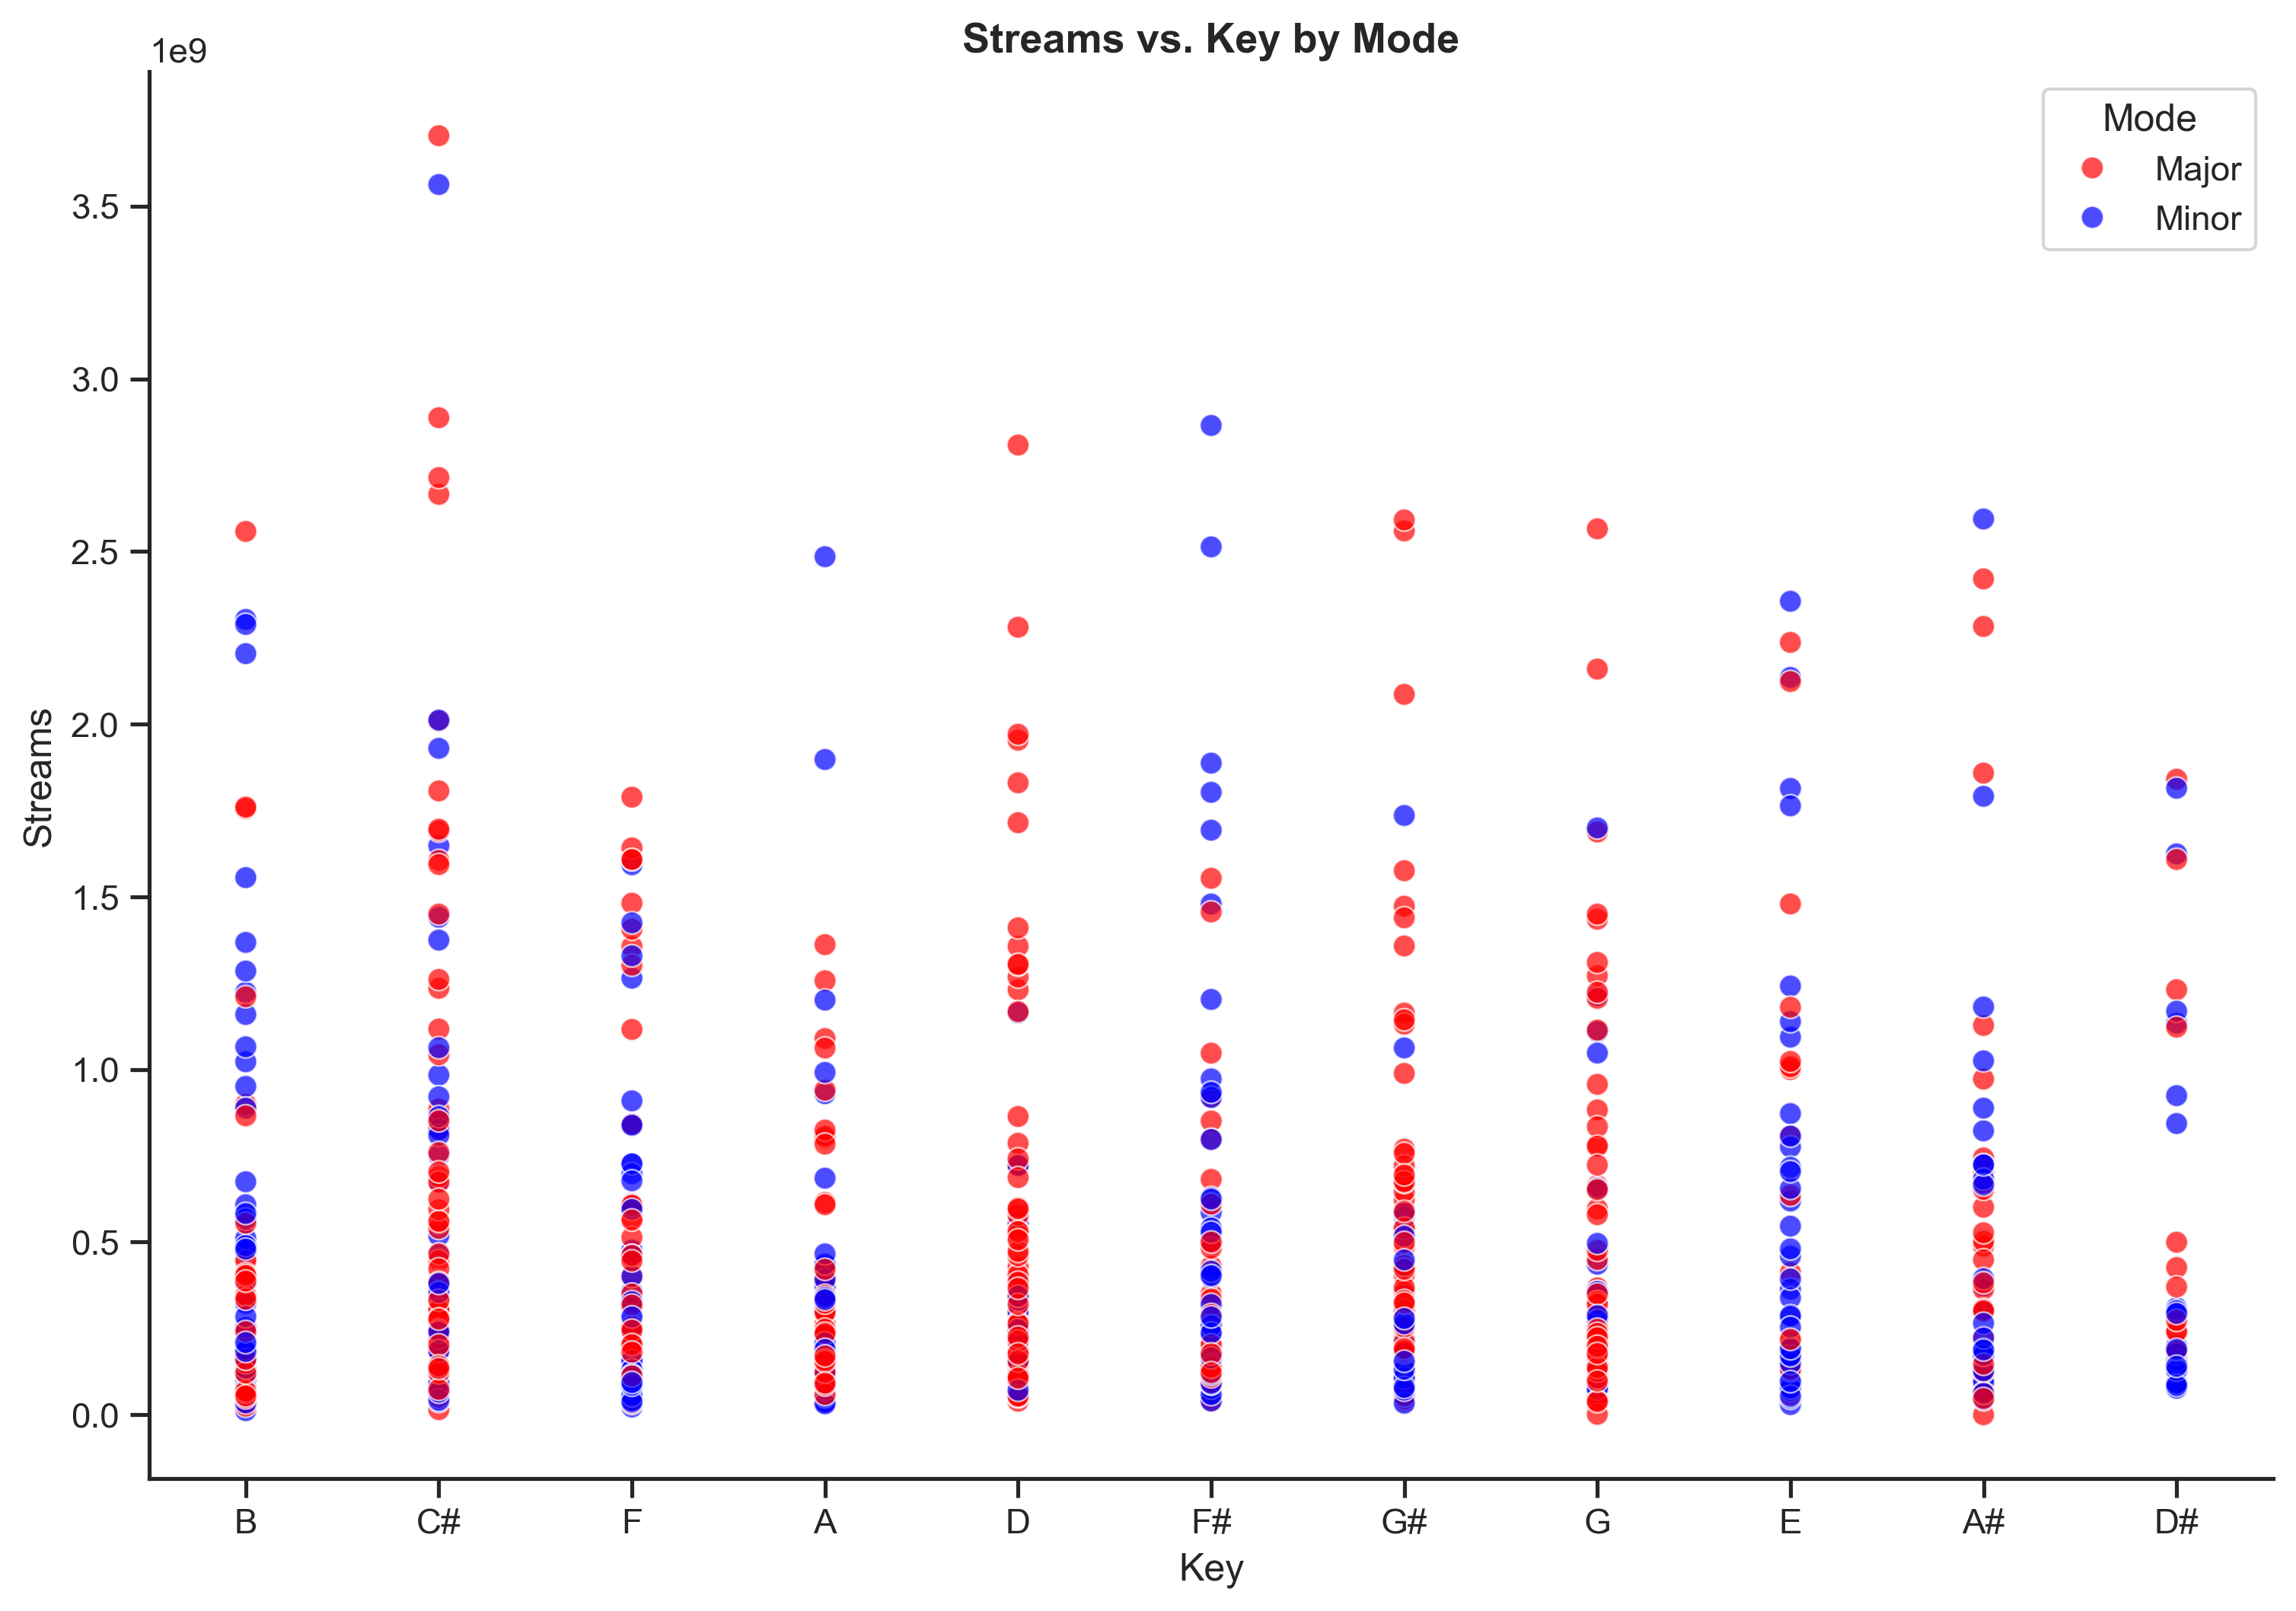

In [1257]:
# Setting figure size and style
plt.figure(figsize=(12, 8), dpi = 300)

# Scatter plot with hue differentiation by mode
sns.scatterplot(data=data, x='key', y='streams', hue='mode', palette=['red','blue'], s=50, alpha=0.7)

# Titles and labels
plt.title('Streams vs. Key by Mode', fontsize=13, fontweight='bold')
plt.xlabel('Key', fontsize=12)
plt.ylabel('Streams', fontsize=12)

# Adjusting legend and styling
plt.legend(title='Mode', loc='upper right')
sns.despine()

# Show plot
plt.show()

#### Analysis and Interpretation:

> The scatter plot in the image visualizes the relationship between the number of streams and the musical key, differentiated by mode (Major vs. Minor). Each dot represents a track, with red dots indicating Major mode and blue dots indicating Minor mode. The plot reveals that tracks in Major mode generally have a higher number of streams compared to those in Minor mode, especially noticeable in keys such as B, C#, and F#. Additionally, there is a significant clustering of high-stream tracks in Major mode across various keys, suggesting that Major mode tracks might be more popular or widely streamed.

#### *<b>Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.</b>*


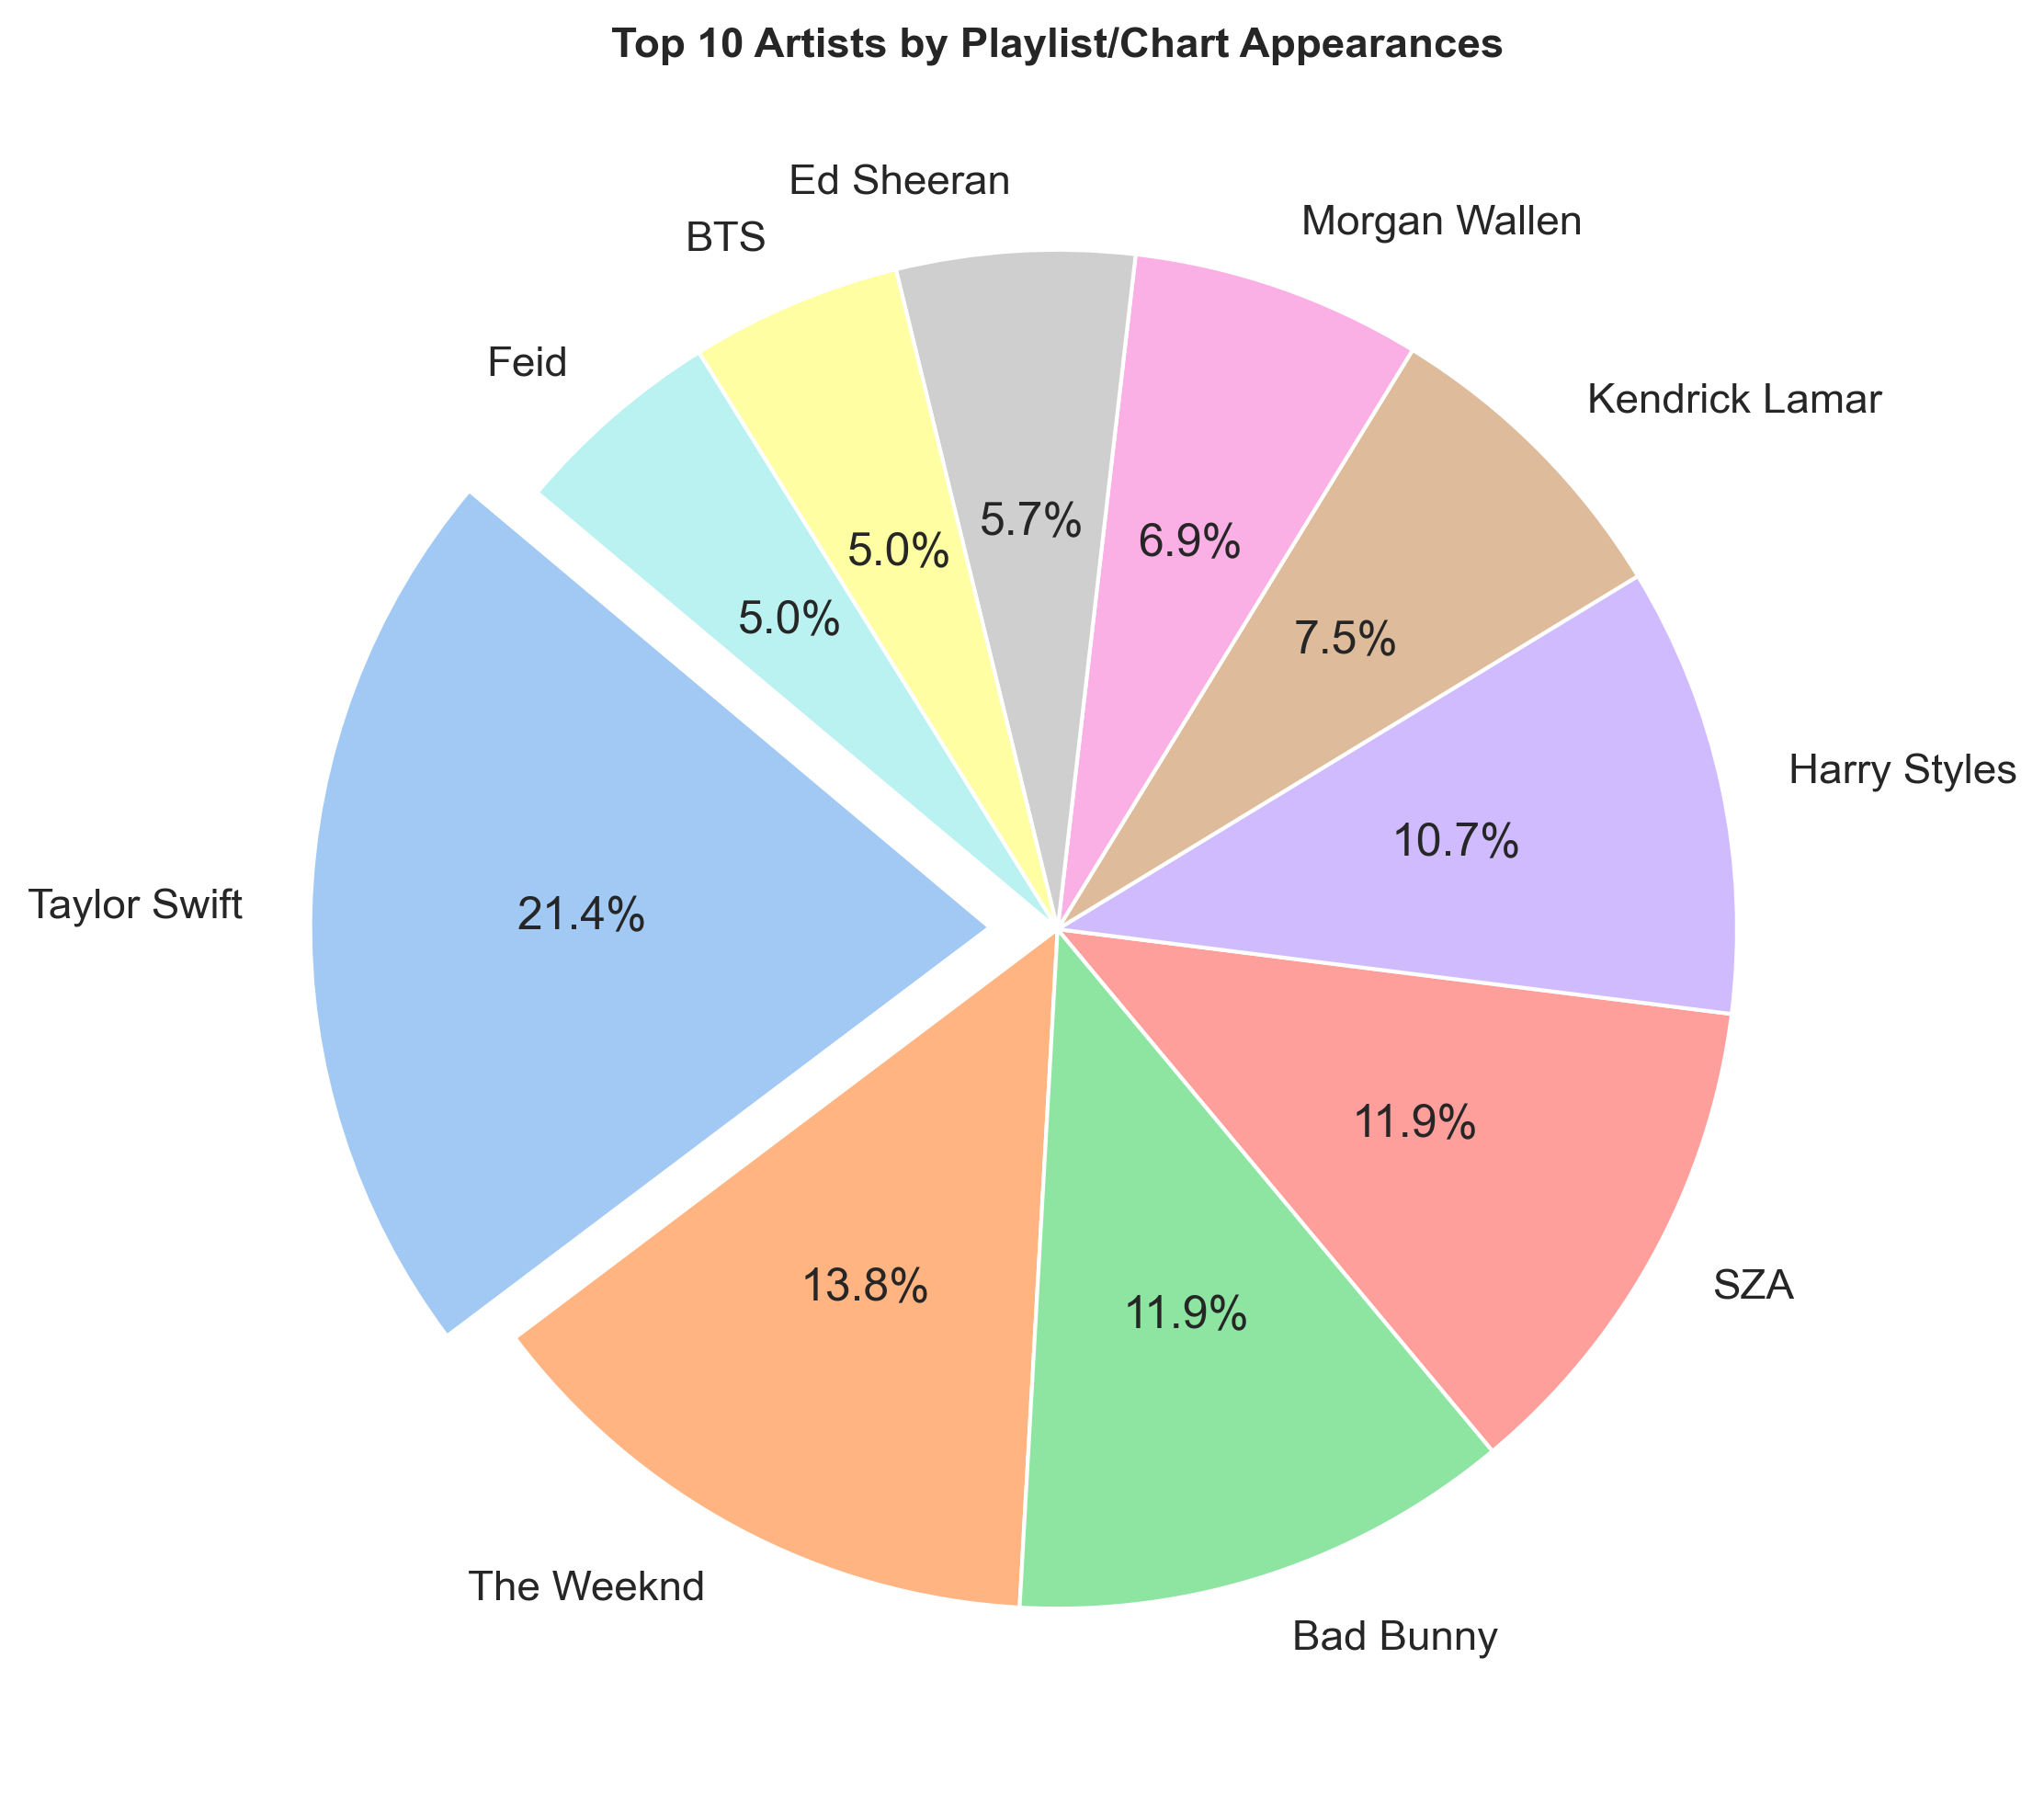

In [1261]:
# Top 10 artists by playlist/chart appearances
top_artists = data['artist(s)_name'].value_counts().nlargest(10)

# Setting figure size and color palette
plt.figure(figsize=(8, 8), dpi = 300)
colors = sns.color_palette('pastel')[0:10]

# Pie chart with labels and percentage
plt.pie(top_artists, labels=top_artists.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0.1] + [0]*9)

# Title
plt.title('Top 10 Artists by Playlist/Chart Appearances', fontsize=11, fontweight = 'bold')

# Show plot
plt.show()

#### Analysis and Interpretation:

> The pie chart reveals a significant concentration of playlist and chart appearances among a few top artists, with Taylor Swift leading at 21.4%, followed by The Weeknd at 13.8%. This dominance indicates a highly competitive music industry where a few major artists capture a large audience's attention, potentially influencing trends and listener preferences. The smaller shares held by other artists like SZA, Bad Bunny, and Harry Styles suggest that while they are popular, there's still a significant disparity in exposure compared to the top two. This visualization underscores the importance for emerging artists to find unique ways to stand out in a market heavily skewed towards a few big names. For artists aiming to break through, leveraging niche markets or innovative marketing strategies might be essential to gaining a foothold in such a saturated industry.

***

***